# –ê–Ω–∞–ª–∏–∑ –æ–±—ä—è–≤–ª–µ–Ω–∏–π –æ –ø—Ä–æ–¥–∞–∂–µ –∫–≤–∞—Ä—Ç–∏—Ä –Ω–∞ –¶–∏–∞–Ω–µ

–í –Ω–∞—à–µ–º —Ä–∞—Å–ø–æ—Ä—è–∂–µ–Ω–∏–∏ –¥–∞–Ω–Ω—ã–µ —Å–µ—Ä–≤–∏—Å–∞ –¶–∏–∞–Ω - –æ–±—è–≤–ª–µ–Ω–∏—è –æ –ø—Ä–æ–¥–∞–∂–µ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ –≤ –ú–æ—Å–∫–≤–µ.

In [1]:
# –∏–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º –≤—Å–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏
import pandas as pd
import numpy as np
from scipy import stats as sts
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from IPython.display import clear_output
import seaborn as sns
from wordcloud import WordCloud
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set(context='notebook', style='darkgrid',
palette='deep', font='sans-serif', font_scale=1,
color_codes=True, rc=None)

#### –û—Ç–∫—Ä–æ–µ–º —Ñ–∞–π–ª —Å –¥–∞–Ω–Ω—ã–º–∏ –∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø–æ–ª—É—á–µ–Ω–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é

In [3]:
df = pd.read_csv('cian_parsing_total.csv', encoding = 'cp1251', sep=";", na_values = ['-1.0'])
print(df.shape)
df.head()

(2487, 20)


author        author_type                                      link  \
0    MR Group          developer  https://www.cian.ru/sale/flat/284803737/   
1   –§–°–ö –ê–≥–µ–Ω—Ç  real_estate_agent  https://www.cian.ru/sale/flat/285582584/   
2      –¢–∞—É—ç—Ä—Å          developer  https://www.cian.ru/sale/flat/284623846/   
3      –¢–∞—É—ç—Ä—Å          developer  https://www.cian.ru/sale/flat/283393305/   
4  Wainbridge          developer  https://www.cian.ru/sale/flat/280811109/   

     city deal_type accommodation_type  floor  floors_count  rooms_count  \
0  –ú–æ—Å–∫–≤–∞      sale               flat     33            41          NaN   
1  –ú–æ—Å–∫–≤–∞      sale               flat      4            30          2.0   
2  –ú–æ—Å–∫–≤–∞      sale               flat     46            66          2.0   
3  –ú–æ—Å–∫–≤–∞      sale               flat     65            78          3.0   
4  –ú–æ—Å–∫–≤–∞      sale               flat     14            20          2.0   

   total_meters  price_per_m2     price  year_of_construction  living_meters  \
0           1.0      37111200  37111200                2021.0           51.0   
1          70.6        390934  27600000                2023.0           34.8   
2          84.4        746000  62962400                2020.0            NaN   
3          81.5        865000  70497500                2019.0            NaN   
4          63.7        431711  27500000                2023.0            NaN   

   kitchen_meters        phone           district  \
0             NaN  74951374675     –§–∏–ª–µ–≤—Å–∫–∏–π –ø–∞—Ä–∫   
1            16.5  79623682283  –•–æ—Ä–æ—à–µ–≤–æ-–ú–Ω–µ–≤–Ω–∏–∫–∏   
2             NaN  74951348365        –ü—Ä–µ—Å–Ω–µ–Ω—Å–∫–∏–π   
3             NaN  74951348365        –ü—Ä–µ—Å–Ω–µ–Ω—Å–∫–∏–π   
4             NaN  74951346462       –õ–µ–≤–æ–±–µ—Ä–µ–∂–Ω—ã–π   

                         street  underground residential_complex  
0        –ë–∞–≥—Ä–∞—Ç–∏–æ–Ω–æ–≤—Å–∫–∏–π –ø—Ä–æ–µ–∑–¥         –§–∏–ª–∏            Filicity  
1                           NaN     –•–æ—Ä–æ—à—ë–≤–æ      –°–∏–¥–Ω–µ–π –°–∏—Ç–∏ –ñ–ö  
2  1-–π –ö—Ä–∞—Å–Ω–æ–≥–≤–∞—Ä–¥–µ–π—Å–∫–∏–π –ø—Ä–æ–µ–∑–¥  –í—ã—Å—Ç–∞–≤–æ—á–Ω–∞—è         NEVA TOWERS  
3  1-–π –ö—Ä–∞—Å–Ω–æ–≥–≤–∞—Ä–¥–µ–π—Å–∫–∏–π –ø—Ä–æ–µ–∑–¥  –í—ã—Å—Ç–∞–≤–æ—á–Ω–∞—è         NEVA TOWERS  
4           –õ–µ–Ω–∏–Ω–≥—Ä–∞–¥—Å–∫–æ–µ —à–æ—Å—Å–µ  –ë–µ–ª–æ–º–æ—Ä—Å–∫–∞—è           Aquatoria

–ü—Ä–æ–≤–µ–¥—ë–º –ø—Ä–æ–≤–µ—Ä–∫—É –Ω–∞ –¥—É–±–ª–∏–∫–∞—Ç—ã:

In [4]:
df.duplicated().sum()

12

–£–¥–∞–ª–∏–º –ø–æ–≤—Ç–æ—Ä—è—é—â–∏–µ—Å—è –∑–Ω–∞—á–µ–Ω–∏—è:

In [5]:
df = df.drop_duplicates(keep = 'first')

–ü—Ä–∏ –ø–∞—Ä—Å–∏–Ω–≥–µ –¥–∞–Ω–Ω—ã—Ö —Å–æ–∑–¥–∞–≤–∞–ª–∞—Å—å –æ—Ç–¥–µ–ª—å–Ω–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è price_per_m2, –¥–ª—è –µ—ë —Ä–∞—Å—á—ë—Ç–∞ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∏—Å—å –¥–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ price –∏ total_meters, –æ–¥–Ω–∞–∫–æ –≤ –∫–∞–∫–∏—Ö-—Ç–æ –æ–±—ä—è–≤–ª–µ–Ω–∏—è—Ö –æ—Ç—Å—É—Ç—Å—Ç–≤–æ–≤–∞–ª–æ –∑–Ω–∞—á–µ–Ω–∏–µ total_meters, —Ç–∞–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ –∑–∞–º–µ–Ω—è–ª–∏—Å—å –Ω–∞ -1, –ø–æ—ç—Ç–æ–º—É –ø—Ä–∏ —Ä–∞—Å—á—ë—Ç–µ –∑–Ω–∞—á–µ–Ω–∏—è price_per_m2 –ø–æ–ª—É—á–∞–ª–æ—Å—å –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–æ–µ —á–∏—Å–ª–æ. –°—Ç—Ä–æ–∫–∏ —Å —Ç–∞–∫–∏–º–∏ –¥–∞–Ω–Ω–Ω—ã–º–∏ –º—ã —É–¥–∞–ª–∏–º, –ø–æ—Å–∫–æ–ª—å–∫—É –∏—Ö –Ω–µ–º–Ω–æ–≥–æ.

In [6]:
df = df[(df.price_per_m2 > 0)]

In [7]:
df.shape

(2466, 20)

### –ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–∞—è –æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2466 entries, 0 to 2485
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                2466 non-null   object 
 1   author_type           2466 non-null   object 
 2   link                  2466 non-null   object 
 3   city                  2466 non-null   object 
 4   deal_type             2466 non-null   object 
 5   accommodation_type    2466 non-null   object 
 6   floor                 2466 non-null   int64  
 7   floors_count          2466 non-null   int64  
 8   rooms_count           2359 non-null   float64
 9   total_meters          2466 non-null   float64
 10  price_per_m2          2466 non-null   int64  
 11  price                 2466 non-null   int64  
 12  year_of_construction  2385 non-null   float64
 13  living_meters         1617 non-null   float64
 14  kitchen_meters        1810 non-null   float64
 15  phone                

–ö—Ä–∞—Ç–∫–æ –æ–ø–∏—à–µ–º –∏–º–µ—é—â–∏–µ—Å—è –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:
- district - —Ä–∞–π–æ–Ω
- underground - –±–ª–∏–∂–∞–π—à–∞—è —Å—Ç–∞–Ω—Ü–∏—è –º–µ—Ç—Ä–æ
- street - —É–ª–∏—Ü–∞
- floor - —ç—Ç–∞–∂
- floors_count - –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç—Ç–∞–∂–µ–π
- total_meters - –æ–±—â–∞—è –ø–ª–æ—â–∞–¥—å
- living_meters - –∂–∏–ª–∞—è –ø–ª–æ—â–∞–¥—å
- kitchen_meters - –ø–ª–æ—â–∞–¥—å –∫—É—Ö–Ω–∏
- rooms_count - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–º–Ω–∞—Ç
- year_of_construction - –≥–æ–¥ –ø–æ—Å—Ç—Ä–æ–π–∫–∏ –∑–¥–∞–Ω–∏—è
- price - –æ–±—â–∞—è —Å—Ç–æ–∏–º–æ—Å—Ç—å
- price_per_m2 - —Å—Ç–æ–∏–º–æ—Å—Ç—å –Ω–∞ –∫–≤–∞–¥—Ä–∞—Ç–Ω—ã–π –º–µ—Ç—Ä
- author - –∞–≤—Ç–æ—Ä –æ–±—ä—è–≤–ª–µ–Ω–∏—è
- author_type - —Ç–∏–ø –∞–≤—Ç–æ—Ä–∞
- phone - –Ω–æ–º–µ—Ä —Ç–µ–ª–µ—Ñ–æ–Ω–∞ –≤ –æ–±—ä—è–≤–ª–µ–Ω–∏–∏
- link - —Å—Å—ã–ª–∫–∞ –Ω–∞ –æ–±—ä—è–≤–ª–µ–Ω–∏–µ
- residential_complex - –Ω–∞–∑–≤–∞–Ω–∏–µ –ñ–ö
- city - –Ω–∞–∑–≤–∞–Ω–∏–µ –≥–æ—Ä–æ–¥–∞, –≤ –Ω–∞—à–µ–º –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–∏ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–µ—Ç—Å—è —Ç–æ–ª—å–∫–æ –ú–æ—Å–∫–≤–∞
- deal_type - —Ç–∏–ø –æ–±—ä—è–≤–ª–µ–Ω–∏—è, –º—ã —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–µ–º —Ç–æ–ª—å–∫–æ –ø—Ä–æ–¥–∞–∂—É
- accommodation_type - –≤–∏–¥ –∂–∏–ª—å—è, –º—ã —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–µ–º —Ç–æ–ª—å–∫–æ –∫–≤–∞—Ä—Ç–∏—Ä—ã

–í–æ–∑–º–æ–∂–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ–ª—è author_type:
- real_estate_agent - –∞–≥–µ–Ω—Ç—Å—Ç–≤–æ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏
- homeowner - —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–∏–∫
- realtor - —Ä–∏–µ–ª—Ç–æ—Ä
- official_representative - —É–∫ –æ—Ñ.–ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç–µ–ª—å
- representative_developer - –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç–µ–ª—å –∑–∞—Å—Ç—Ä–æ–π—â–∏–∫–∞
- developer - –∑–∞—Å—Ç—Ä–æ–π—â–∏–∫
- unknown - –±–µ–∑ —É–∫–∞–∑–∞–Ω–Ω–æ–≥–æ —Ç–∏–ø–∞

–£–¥–∞–ª–∏–º –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –ø–æ–Ω–∞–¥–æ–±—è—Ç—Å—è –≤ —Ö–æ–¥–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è.

In [9]:
df.drop(['link', 'city', 'deal_type', 'accommodation_type', 'phone'], axis = 1 , inplace= True )

–ü–æ—Å–º–æ—Ç—Ä–∏–º, –≤ –∫–∞–∫–∏—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö –µ—Å—Ç—å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è.

In [10]:
df.isnull().sum()

author                     0
author_type                0
floor                      0
floors_count               0
rooms_count              107
total_meters               0
price_per_m2               0
price                      0
year_of_construction      81
living_meters            849
kitchen_meters           656
district                 287
street                   398
underground               66
residential_complex     1275
dtype: int64

–í –Ω–∞—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö 107 –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ –ø—Ä–∏–∑–Ω–∞–∫–µ, –æ—Ç—Ä–∞–∂–∞—é—â–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–º–Ω–∞—Ç, –∏ 66 –≤ –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã—Ö —Å—Ç–∞–Ω—Ü–∏–π –º–µ—Ç—Ä–æ, –±—ã–ª–æ —Ä–µ—à–µ–Ω–æ –∏—Ö —É–¥–∞–ª–∏—Ç—å, –ø–æ—Å–∫–æ–ª—å–∫—É –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–µ—Ç–æ–¥—ã –∑–∞–º–µ–Ω—ã –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –∑–¥–µ—Å—å –Ω–µ —Ü–µ–ª–µ—Å–æ–æ–±—Ä–∞–∑–Ω–æ.

In [11]:
df = df[df['rooms_count'].notna()]
df = df[df['underground'].notna()]

In [12]:
df.isnull().sum()

author                     0
author_type                0
floor                      0
floors_count               0
rooms_count                0
total_meters               0
price_per_m2               0
price                      0
year_of_construction      76
living_meters            796
kitchen_meters           610
district                 255
street                   356
underground                0
residential_complex     1215
dtype: int64

–ú–Ω–æ–≥–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–µ–π –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö "living_meters" –∏ "kitchen_meters", –∏—Ö –º—ã —É–¥–∞–ª–∏—Ç—å –Ω–µ –º–æ–∂–µ–º, –ø–æ—ç—Ç–æ–º—É –ø–æ–¥—É–º–∞–µ–º, —á–µ–º –ª—É—á—à–µ –∏—Ö –∑–∞–ø–æ–ª–Ω–∏—Ç—å. –î–ª—è –Ω–∞—á–∞–ª–∞ –≤—ã–≤–µ–¥–µ–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É –¥–ª—è —Å—Ç–æ–ª–±—Ü–æ–≤ "living_meters" –∏ "kitchen_meters". –ü–æ —Å—Ç–æ–ª–±—Ü–∞–º —Å –Ω–∞–∏–±–æ–ª—å—à–µ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π –∑–∞–ø–æ–ª–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏.

In [13]:
numeric_cols = df.select_dtypes(include = ['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()
corr_matrix[['living_meters', 'kitchen_meters']]

living_meters  kitchen_meters
floor                      0.143913        0.223363
floors_count               0.066191        0.292847
rooms_count                0.768461        0.321555
total_meters               0.897949        0.508889
price_per_m2               0.422959        0.274067
price                      0.549217        0.358701
year_of_construction      -0.001003        0.388097
living_meters              1.000000        0.291434
kitchen_meters             0.291434        1.000000

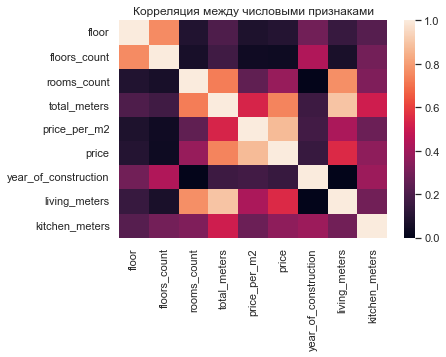

In [14]:
plt.title('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É —á–∏—Å–ª–æ–≤—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏')
sns.heatmap(corr_matrix);

In [15]:
max_corr = (corr_matrix[['living_meters', 'kitchen_meters']].drop(['living_meters', 'kitchen_meters']).abs()).max()
max_corr

living_meters     0.897949
kitchen_meters    0.508889
dtype: float64

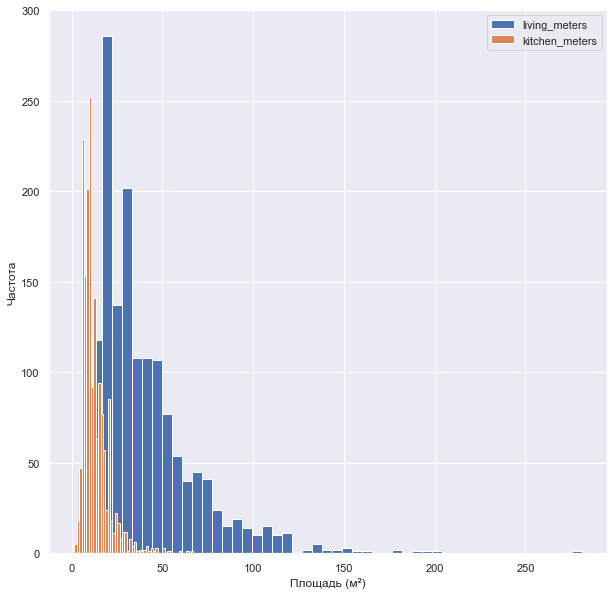

In [16]:
# –ü–æ—Å—Ç—Ä–æ–∏–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –¥–ª—è —Å—Ç–æ–ª–±—Ü–æ–≤ "living_meters" –∏ "kitchen_meters"
df['living_meters'].hist(bins = 50, figsize = (10, 10))
df['kitchen_meters'].hist(bins = 50, figsize = (10, 10))
plt.xlabel('–ü–ª–æ—â–∞–¥—å (–º¬≤)')
plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
plt.legend(['living_meters', 'kitchen_meters']);

–ì—Ä—É–ø–ø–∏—Ä—É–µ–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –ø–æ —Å—Ç–æ–ª–±—Ü—É —Å –Ω–∞–∏–±–æ–ª—å—à–µ–π –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–µ–π - "total_meters". –ü–æ —ç—Ç–∏–º –≥—Ä—É–ø–ø–∞–º –≤—ã—á–∏—Å–ª—è–µ–º –º–µ–¥–∏–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∂–∏–ª–æ–π –ø–ª–æ—â–∞–¥–∏ –∏ –ø–ª–æ—â–∞–¥–∏ –∫—É—Ö–Ω–∏. –≠—Ç–∏–º–∏ –º–µ–¥–∏–∞–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –∑–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö "living_meters" –∏ "kitchen_meters".

–ö–∞–∫ –≤–∏–¥–Ω–æ –ø–æ –≥—Ä–∞—Ñ–∏–∫–∞–º –≤—ã—à–µ, —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∂–∏–ª–æ–π –ø–ª–æ—â–∞–¥–∏ –∏ –ø–ª–æ—â–∞–¥–∏ –∫—É—Ö–Ω–∏ –Ω–∞–ø–æ–º–∏–Ω–∞–µ—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ü—É–∞—Å—Å–æ–Ω–∞. –ü—Ä–∏ —Ç–∞–∫–æ–º —Å–º–µ—â–µ–Ω–Ω–æ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–∏ —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–∏–ª—å–Ω–æ —Å–º–µ—â–µ–Ω–æ –≤ —Å—Ç–æ—Ä–æ–Ω—É –≤—ã–±—Ä–æ—Å–æ–≤ –∏ –Ω–µ –±—É–¥–µ—Ç —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏–∑–æ–≤–∞—Ç—å —Ç–∏–ø–∏—á–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –≤ –¥–∞–Ω–Ω—ã—Ö.

–ú—ã —Ä–µ—à–∏–ª–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–µ–¥–∏–∞–Ω—ã –¥–ª—è –∑–∞–º–µ–Ω—ã –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø—Ä–∏–∑–Ω–∞–∫–∞ —Å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º –ü—É–∞—Å—Å–æ–Ω–∞, –ø–æ—Å–∫–æ–ª—å–∫—É –º–µ–¥–∏–∞–Ω–∞ –±–æ–ª–µ–µ —É—Å—Ç–æ–π—á–∏–≤–∞ –∫ –≤—ã–±—Ä–æ—Å–∞–º –∏ –Ω–µ —Å–∏–ª—å–Ω–æ –∏–∑–º–µ–Ω–∏—Ç —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ —Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–π —Ç–µ–Ω–¥–µ–Ω—Ü–∏–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –∑–∞–º–µ–Ω–∞ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –Ω–∞ –º–µ–¥–∏–∞–Ω—É –º–æ–∂–µ—Ç –±—ã—Ç—å –±–æ–ª–µ–µ –Ω–∞–¥–µ–∂–Ω—ã–º –∏ —Ç–æ—á–Ω—ã–º —Å–ø–æ—Å–æ–±–æ–º –¥–ª—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º –ü—É–∞—Å—Å–æ–Ω–∞.

In [17]:
df['living_meters'] = df['living_meters'].fillna(df.groupby('total_meters')['living_meters'].median())
df['kitchen_meters'] = df['kitchen_meters'].fillna(df.groupby('total_meters')['kitchen_meters'].median())

In [18]:
df.isnull().sum()

author                     0
author_type                0
floor                      0
floors_count               0
rooms_count                0
total_meters               0
price_per_m2               0
price                      0
year_of_construction      76
living_meters            722
kitchen_meters           546
district                 255
street                   356
underground                0
residential_complex     1215
dtype: int64

__–í—ã–≤–æ–¥:__ –ü–æ–ª—É—á–∏–ª–æ—Å—å, —á—Ç–æ –∑–∞–º–µ–Ω–∞ –Ω–∞ –º–µ–¥–∏–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ—Å–ª–µ –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∏ —Å "total_meters" –ø–æ–∫—Ä—ã–ª–∞ –Ω–µ –≤—Å–µ –ø—Ä–æ–ø—É—Å–∫–∏. –ü—Ä–∏–¥–µ—Ç—Å—è –æ–±—Ä–∞—Ç–∏—Ç—å—Å—è –∫ –¥—Ä—É–≥–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É. –ì–ª—è–¥—è –Ω–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É, "total_meters" –∏ "living_meters", –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—Ç —Ç–∞–∫–∂–µ –∏ —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –∫–æ–º–Ω–∞—Ç. –ó–∞–º–µ–Ω–∏–º –æ—Å—Ç–∞–≤—à–∏–µ—Å—è –ø—Ä–æ–ø—É—Å–∫–∏ –Ω–∞ –º–µ–¥–∏–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è, –≥—Ä—É–ø–ø–∏—Ä—É—è –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å–æ —Å—Ç–æ–ª–±—Ü–æ–º "rooms_count".

In [19]:
for i in range(1, 5):
    df['living_meters'] = df['living_meters'].fillna(round(df.loc[df['rooms_count'] == i , 'living_meters'].median(), 1))
    df['kitchen_meters'] = df['kitchen_meters'].fillna(df.loc[df['rooms_count'] == i , 'kitchen_meters'].median())

In [20]:
df.isnull().sum()

author                     0
author_type                0
floor                      0
floors_count               0
rooms_count                0
total_meters               0
price_per_m2               0
price                      0
year_of_construction      76
living_meters              0
kitchen_meters             0
district                 255
street                   356
underground                0
residential_complex     1215
dtype: int64

### –ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º —Å–≤–æ–¥–Ω—É—é —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ —á–∏—Å–ª–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –≤ –∏—Å—Ö–æ–¥–Ω–æ–π —Ç–∞–±–ª–∏—Ü–µ

In [21]:
df.describe()

floor  floors_count  rooms_count  total_meters  price_per_m2  \
count  2293.000000   2293.000000  2293.000000   2293.000000  2.293000e+03   
mean      9.812473     18.957261     2.406891     76.619520  4.425544e+05   
std      10.174896     14.215369     1.066991     45.469129  3.386303e+05   
min       1.000000      2.000000     1.000000     11.500000  1.144570e+05   
25%       3.000000      9.000000     2.000000     42.500000  2.592590e+05   
50%       7.000000     16.000000     2.000000     63.500000  3.375000e+05   
75%      13.000000     23.000000     3.000000     96.340000  4.771580e+05   
max      85.000000     95.000000     5.000000    473.800000  5.378928e+06   

              price  year_of_construction  living_meters  kitchen_meters  
count  2.293000e+03           2217.000000    2293.000000     2293.000000  
mean   4.212793e+07           2001.700045      34.438487       11.883428  
std    6.872301e+07             26.309680      25.958778        6.435557  
min    3.500000e+06           1826.000000       5.600000        1.500000  
25%    1.220000e+07           1980.000000      18.600000        9.000000  
50%    2.000000e+07           2015.000000      21.500000        9.700000  
75%    4.271510e+07           2022.000000      43.400000       13.400000  
max    1.227180e+09           2026.000000     281.000000       67.000000

__–í—ã–≤–æ–¥__: –°—É–¥—è –ø–æ –≤—Å–µ–º—É —Å—Ä–µ–¥–Ω—è—è –∫–≤–∞—Ä—Ç–∏—Ä–∞ –∏–º–µ–µ—Ç –æ–±—â—É—é –ø–ª–æ—â–∞–¥—å 76,62 –º¬≤, –∏–∑ –∫–æ—Ç–æ—Ä—ã—Ö 34,4 –º¬≤ - –∂–∏–ª–∞—è –ø–ª–æ—â–∞–¥—å –∏ 11,9 –º¬≤ - –ø–ª–æ—â–∞–¥—å –∫—É—Ö–Ω–∏. –¶–µ–Ω–∞ —Ç–∞–∫–æ–π –∫–≤–∞—Ä—Ç–∏—Ä—ã –±—É–¥–µ—Ç 42 127 930 —Ä—É–±–ª–µ–π

### EDA. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è

–õ—é–±–æ–ø—ã—Ç–Ω–æ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å, –∫–∞–∫–æ–π –ø—Ä–æ–¥–∞–≤–µ—Ü –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —á–∞—â–µ –≤—Å–µ–≥–æ.

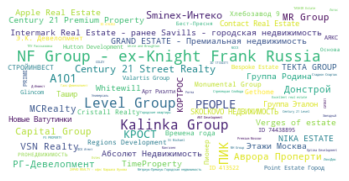

In [22]:
text = df['author'].value_counts().to_dict()
wordcloud = WordCloud(background_color = "white", collocations = True).generate_from_frequencies(text)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off");

–°—É–¥—è –ø–æ –≤—Å–µ–º—É, —á–∞—â–µ –≤—Å–µ–≥–æ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è "NF Group - ex-Knight Frank Russia"

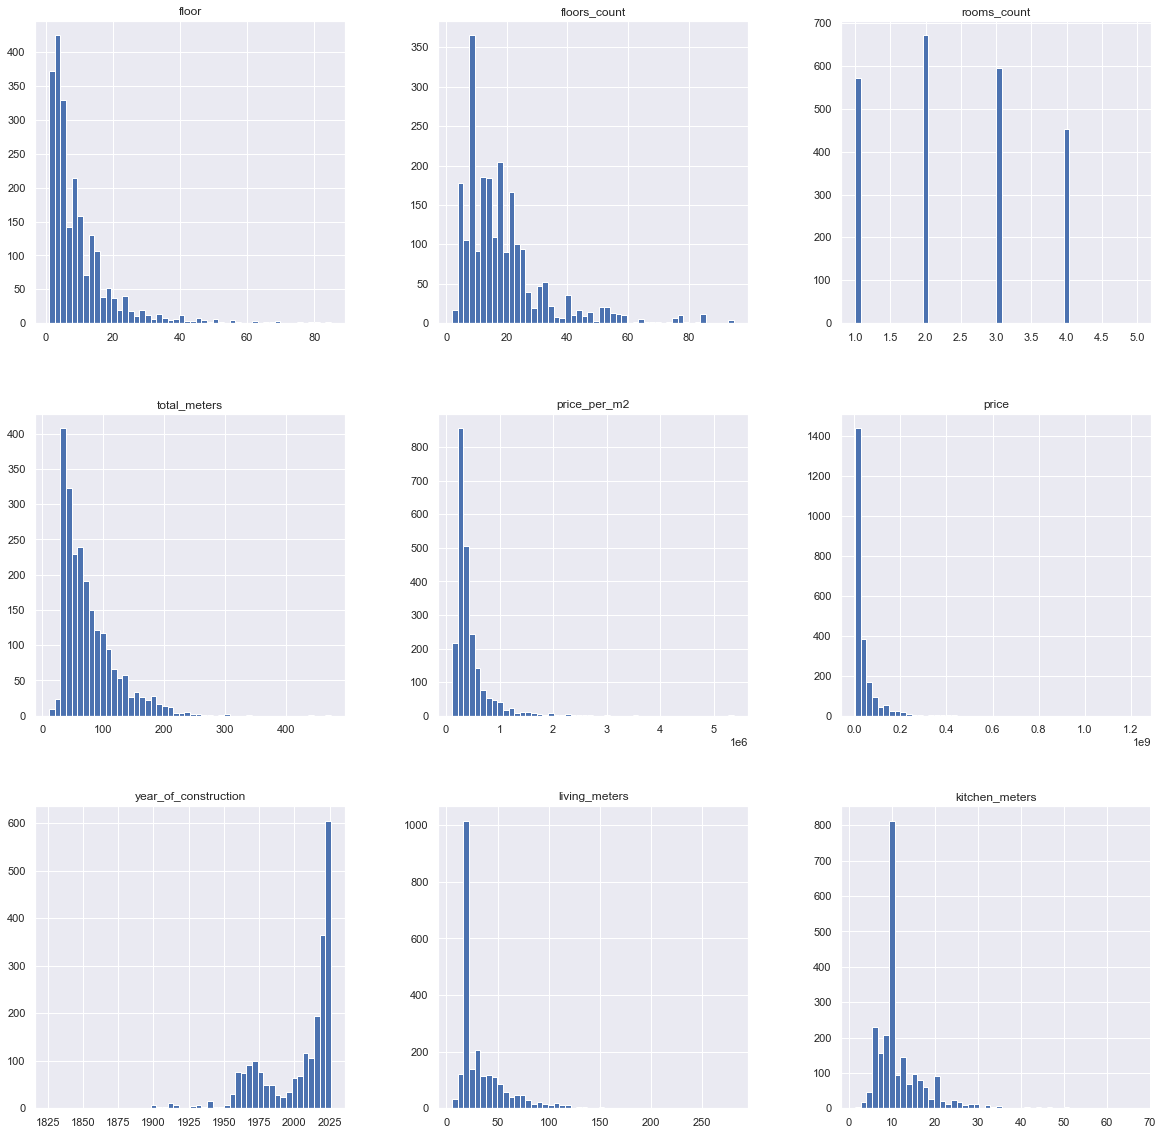

In [23]:
# –ï—â–µ —Ä–∞–∑ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –¥–ª—è –≤—Å–µ—Ö —á–∏—Å–ª–æ–≤—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
df.hist(bins = 50, figsize = (20, 20));

–ò–∑ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –¥–∏–∞–≥—Ä–∞–º–º –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã:
- –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–º–Ω–∞—Ç: –Ω–µ –ø–æ—Ö–æ–∂–µ –Ω–∞ –∫–∞–∫–æ–µ-–ª–∏–±–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ
- –≥–æ–¥ –ø–æ—Å—Ç—Ä–æ–π–∫–∏ –∑–¥–∞–Ω–∏—è: –ø–æ—Ö–æ–∂–µ –Ω–∞ —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ. –≠—Ç–æ –º–æ–∂–µ—Ç –æ–∑–Ω–∞—á–∞—Ç—å, —á—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ "–º–æ–ª–æ–¥–æ–π" –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ –ø—Ä–µ–æ–±–ª–∞–¥–∞–µ—Ç
- —ç—Ç–∞–∂, –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç—Ç–∞–∂–µ–π, —Å—Ç–æ–∏–º–æ—Å—Ç—å, —Å—Ç–æ–∏–º–æ—Å—Ç—å –Ω–∞ –∫–≤–∞–¥—Ä–∞—Ç–Ω—ã–π –º–µ—Ç—Ä, –æ–±—â–∞—è –ø–ª–æ—â–∞–¥—å, –∂–∏–ª–∞—è –ø–ª–æ—â–∞–¥—å –∏ –ø–ª–æ—â–∞–¥—å –∫—É—Ö–Ω–∏ –∏–º–µ—é—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ü—É–∞—Å—Å–æ–Ω–∞. –≠—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ –≤ –≤—ã–±–æ—Ä–∫–∞—Ö –ø–ª–æ—â–∞–¥–∏ –∫–≤–∞—Ä—Ç–∏—Ä –≤ –Ω–æ–≤–æ—Å—Ç—Ä–æ–π–∫–∞—Ö –∏–ª–∏ –∫–≤–∞—Ä—Ç–∏—Ä –≤ –∫—Ä—É–ø–Ω—ã—Ö –º–Ω–æ–≥–æ–∫–≤–∞—Ä—Ç–∏—Ä–Ω—ã—Ö –¥–æ–º–∞—Ö –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–µ –∫–ª–∞—Å—Å—ã –ø–ª–æ—â–∞–¥–µ–π –∫–≤–∞—Ä—Ç–∏—Ä, –∏—Ö —Å—Ç–æ–∏–º–æ—Å—Ç—å –∏ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–µ –≤ –¥–æ–º–µ –º–æ–≥—É—Ç –±—ã—Ç—å –±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–º–∏, —á–µ–º –¥—Ä—É–≥–∏–µ –∫–ª–∞—Å—Å—ã.

#### –ò–∑—É—á–∏–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –ø–æ —Ä–∞–∑–ª–∏—á–Ω—ã–º –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º

- –û–±—â–∞—è –ø–ª–æ—â–∞–¥—å:

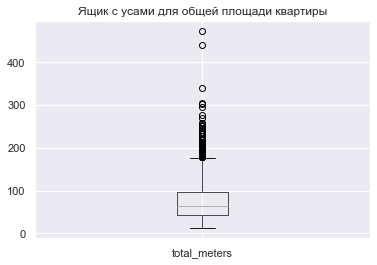

In [24]:
df.boxplot(column = 'total_meters')
plt.title('–Ø—â–∏–∫ —Å —É—Å–∞–º–∏ –¥–ª—è –æ–±—â–µ–π –ø–ª–æ—â–∞–¥–∏ –∫–≤–∞—Ä—Ç–∏—Ä—ã');

In [25]:
df['total_meters'].describe().apply('{0:.2f}'.format)

count    2293.00
mean       76.62
std        45.47
min        11.50
25%        42.50
50%        63.50
75%        96.34
max       473.80
Name: total_meters, dtype: object

–ù–∞–π–¥–µ–º –∑–Ω–∞—á–µ–Ω–∏–µ "–≤–µ—Ä—Ö–Ω–µ–≥–æ —É—Å–∞":

In [26]:
max_total_m = 96.34 + 1.5 * (96.34 - 42.50)
print(round(max_total_m, 2))

177.1


–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤:

In [27]:
df.loc[df['total_meters'] > max_total_m].shape[0]

97

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —Å—Ä–µ–¥–Ω—è—è –ø–ª–æ—â–∞–¥—å –∫–≤–∞—Ä—Ç–∏—Ä—ã, –≤—ã—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ–π –Ω–∞ –ø—Ä–æ–¥–∞–∂—É, —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 76.62 –º¬≤. –í –æ–±—ä—è–≤–ª–µ–Ω–∏—è—Ö —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è –º–Ω–æ–≥–æ –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ –ø–∞—Ä–∞–º–µ—Ç—Ä—É –æ–±—â–∞—è –ø–ª–æ—â–∞–¥—å, —ç—Ç–æ –æ–±—ä—è–≤–ª–µ–Ω–∏—è —Å –ø–ª–æ—â–∞–¥—å—é –∫–≤–∞—Ä—Ç–∏—Ä—ã –±–æ–ª–µ–µ 177.1 –º¬≤, —Ç–∞–∫–∏—Ö –∫–≤–∞—Ä—Ç–∏—Ä –Ω–∞—Å—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è 97.

- –ñ–∏–ª–∞—è –ø–ª–æ—â–∞–¥—å:

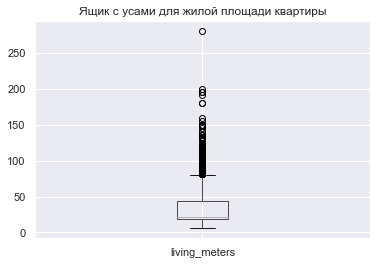

In [28]:
df.boxplot(column = 'living_meters')
plt.title('–Ø—â–∏–∫ —Å —É—Å–∞–º–∏ –¥–ª—è –∂–∏–ª–æ–π –ø–ª–æ—â–∞–¥–∏ –∫–≤–∞—Ä—Ç–∏—Ä—ã');

In [29]:
df['living_meters'].describe().apply('{0:.2f}'.format)

count    2293.00
mean       34.44
std        25.96
min         5.60
25%        18.60
50%        21.50
75%        43.40
max       281.00
Name: living_meters, dtype: object

–ù–∞–π–¥–µ–º –∑–Ω–∞—á–µ–Ω–∏–µ "–≤–µ—Ä—Ö–Ω–µ–≥–æ —É—Å–∞":

In [30]:
max_liv_m = 43.40 + 1.5 * (43.40 - 18.60)
print(round(max_liv_m, 2))

80.6


–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤:

In [31]:
df.loc[df['living_meters'] > max_liv_m].shape[0]

139

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —Å—Ä–µ–¥–Ω—è—è –∂–∏–ª–∞—è –ø–ª–æ—â–∞–¥—å –∫–≤–∞—Ä—Ç–∏—Ä—ã, –≤—ã—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ–π –Ω–∞ –ø—Ä–æ–¥–∞–∂—É, —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 34.44 –º¬≤. –í –æ–±—ä—è–≤–ª–µ–Ω–∏—è—Ö —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è –º–Ω–æ–≥–æ –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ –ø–∞—Ä–∞–º–µ—Ç—Ä—É –∂–∏–ª–∞—è –ø–ª–æ—â–∞–¥—å, —ç—Ç–æ –æ–±—ä—è–≤–ª–µ–Ω–∏—è —Å –∂–∏–ª–æ–π –ø–ª–æ—â–∞–¥—å—é –±–æ–ª–µ–µ 80.6 –º¬≤, —Ç–∞–∫–∏—Ö –∫–≤–∞—Ä—Ç–∏—Ä –Ω–∞—Å—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è 139.

- –ü–ª–æ—â–∞–¥—å –∫—É—Ö–Ω–∏:

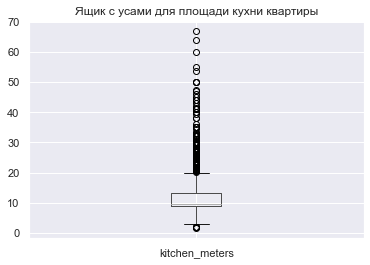

In [32]:
df.boxplot(column = 'kitchen_meters')
plt.title('–Ø—â–∏–∫ —Å —É—Å–∞–º–∏ –¥–ª—è –ø–ª–æ—â–∞–¥–∏ –∫—É—Ö–Ω–∏ –∫–≤–∞—Ä—Ç–∏—Ä—ã');

In [33]:
df['kitchen_meters'].describe().apply('{0:.2f}'.format)

count    2293.00
mean       11.88
std         6.44
min         1.50
25%         9.00
50%         9.70
75%        13.40
max        67.00
Name: kitchen_meters, dtype: object

–ù–∞–π–¥–µ–º –∑–Ω–∞—á–µ–Ω–∏–µ "–≤–µ—Ä—Ö–Ω–µ–≥–æ —É—Å–∞":

In [34]:
max_kit_m = 13.40 + 1.5 * (13.40 - 9.00)
print(round(max_kit_m, 2))

20.0


–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤:

In [35]:
df.loc[df['kitchen_meters'] > max_kit_m].shape[0]

181

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —Å—Ä–µ–¥–Ω—è—è –ø–ª–æ—â–∞–¥—å –∫—É—Ö–Ω–∏ –∫–≤–∞—Ä—Ç–∏—Ä—ã, –≤—ã—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ–π –Ω–∞ –ø—Ä–æ–¥–∞–∂—É, —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 11.88 –º¬≤. –í –æ–±—ä—è–≤–ª–µ–Ω–∏—è—Ö —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è –º–Ω–æ–≥–æ –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ –ø–∞—Ä–∞–º–µ—Ç—Ä—É –ø–ª–æ—â–∞–¥—å –∫—É—Ö–Ω–∏, —ç—Ç–æ –æ–±—ä—è–≤–ª–µ–Ω–∏—è —Å –ø–ª–æ—â–∞–¥—å—é –∫—É—Ö–Ω–∏ –±–æ–ª–µ–µ 20 –º¬≤, —Ç–∞–∫–∏—Ö –∫–≤–∞—Ä—Ç–∏—Ä –Ω–∞—Å—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è 181.

- –°—Ç–æ–∏–º–æ—Å—Ç—å:

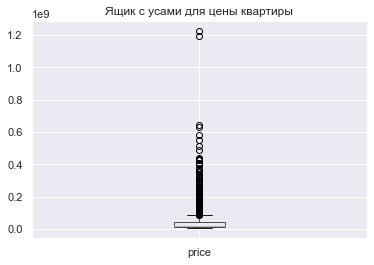

In [36]:
df.boxplot(column = 'price')
plt.title('–Ø—â–∏–∫ —Å —É—Å–∞–º–∏ –¥–ª—è —Ü–µ–Ω—ã –∫–≤–∞—Ä—Ç–∏—Ä—ã');

In [37]:
df['price'].describe().apply('{0:.2f}'.format)

count          2293.00
mean       42127929.99
std        68723013.88
min         3500000.00
25%        12200000.00
50%        20000000.00
75%        42715100.00
max      1227180000.00
Name: price, dtype: object

–ù–∞–π–¥–µ–º –∑–Ω–∞—á–µ–Ω–∏–µ "–≤–µ—Ä—Ö–Ω–µ–≥–æ —É—Å–∞":

In [38]:
max_pr = 42715100.00 + 1.5 * (42715100.00 - 12200000.00)
print(round(max_pr, 2))

88487750.0


–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤:

In [39]:
df.loc[df['price'] > max_pr].shape[0]

256

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —Å—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ –∫–≤–∞—Ä—Ç–∏—Ä—ã, –≤—ã—Å—Ç–∞–≤–ª–µ–Ω–Ω–æ–π –Ω–∞ –ø—Ä–æ–¥–∞–∂—É, —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 42 127 929.99 —Ä—É–±–ª–µ–π. –í –æ–±—ä—è–≤–ª–µ–Ω–∏—è—Ö —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è –º–Ω–æ–≥–æ –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ –ø–∞—Ä–∞–º–µ—Ç—Ä—É —Å—Ç–æ–∏–º–æ—Å—Ç—å, —ç—Ç–æ –æ–±—ä—è–≤–ª–µ–Ω–∏—è —Å–æ —Å—Ç–æ–∏–º–æ—Å—Ç—å—é –±–æ–ª–µ–µ 88 487 750 —Ä—É–±–ª–µ–π, —Ç–∞–∫–∏—Ö –∫–≤–∞—Ä—Ç–∏—Ä –Ω–∞—Å—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è 256.

- –°—Ç–æ–∏–º–æ—Å—Ç—å –∑–∞ –º¬≤

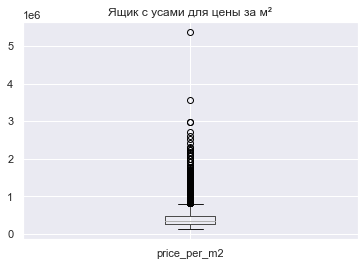

In [40]:
df.boxplot(column = 'price_per_m2')
plt.title('–Ø—â–∏–∫ —Å —É—Å–∞–º–∏ –¥–ª—è —Ü–µ–Ω—ã –∑–∞ –º¬≤');

In [41]:
df['price_per_m2'].describe().apply('{0:.2f}'.format)

count       2293.00
mean      442554.37
std       338630.26
min       114457.00
25%       259259.00
50%       337500.00
75%       477158.00
max      5378928.00
Name: price_per_m2, dtype: object

–ù–∞–π–¥–µ–º –∑–Ω–∞—á–µ–Ω–∏–µ "–≤–µ—Ä—Ö–Ω–µ–≥–æ —É—Å–∞":

In [42]:
max_pr_m2 = 477158.00 + 1.5 * (477158.00 - 259259.00)
print(round(max_pr_m2, 2))

804006.5


–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤:

In [43]:
df.loc[df['price_per_m2'] > max_pr_m2].shape[0]

222

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —Å—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ –∑–∞ –º¬≤ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 442 554.37 —Ä—É–±–ª–µ–π. –í –æ–±—ä—è–≤–ª–µ–Ω–∏—è—Ö —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è –º–Ω–æ–≥–æ –≤—ã–±—Ä–æ—Å–æ–≤ –ø–æ –ø–∞—Ä–∞–º–µ—Ç—Ä—É —Ü–µ–Ω–∞ –∑–∞ –º¬≤, —ç—Ç–æ –æ–±—ä—è–≤–ª–µ–Ω–∏—è —Å–æ —Å—Ç–æ–∏–º–æ—Å—Ç—å—é –±–æ–ª–µ–µ 804 006.5 —Ä—É–±–ª–µ–π, —Ç–∞–∫–∏—Ö –∫–≤–∞—Ä—Ç–∏—Ä –Ω–∞—Å—á–∏—Ç—ã–≤–∞–µ—Ç—Å—è 222.

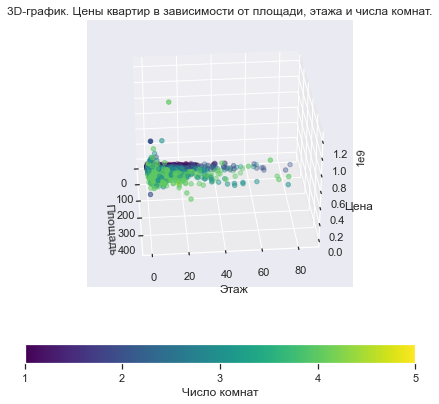

In [44]:
fig = plt.figure(figsize = (7, 7))
ax = plt.axes(projection = '3d')

markercolor = df['rooms_count']

x = df['total_meters']
y = df['floor']
z = df['price']

graph = ax.scatter(x, y, z, c = markercolor, cmap = 'viridis')

ax.set_xlabel('–ü–ª–æ—â–∞–¥—å')
ax.set_ylabel('–≠—Ç–∞–∂')
ax.set_zlabel('–¶–µ–Ω–∞')
plt.colorbar(graph, label = '–ß–∏—Å–ª–æ –∫–æ–º–Ω–∞—Ç', orientation = 'horizontal', location = 'bottom', ticks = [1, 2, 3, 4, 5])
plt.title('3D-–≥—Ä–∞—Ñ–∏–∫. –¶–µ–Ω—ã –∫–≤–∞—Ä—Ç–∏—Ä –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –ø–ª–æ—â–∞–¥–∏, —ç—Ç–∞–∂–∞ –∏ —á–∏—Å–ª–∞ –∫–æ–º–Ω–∞—Ç.');

for angle in range(0, 360, 5):
    ax.view_init(30, angle)
    display(fig)
    plt.pause(.0001)
    clear_output(wait = True)

–ü–æ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏—é –∏ —Ü–≤–µ—Ç—É —Ç–æ—á–µ–∫ –º–æ–∂–µ–º —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ —Å —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º –ø–ª–æ—â–∞–¥–∏, —ç—Ç–∞–∂–∞ –∏ —á–∏—Å–ª–∞ –∫–æ–º–Ω–∞—Ç, —Ü–µ–Ω–∞ —Ç–æ–∂–µ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è.

__–ü—Ä–∏–º–µ—á–∞–Ω–∏–µ:__ —ç—Ç–æ—Ç –≥—Ä–∞—Ñ–∏–∫ –∑–∞–º–æ—Ä–æ–∂–µ–Ω, –Ω–æ –µ—Å–ª–∏ –∑–∞–ø—É—Å—Ç–∏—Ç—å –∫–æ–¥, —Ç–æ –º–æ–∂–Ω–æ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –µ–≥–æ –æ–±–∑–æ—Ä –Ω–∞ 360 –≥—Ä–∞–¥—É—Å–æ–≤ :)

### –ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑

–ò–∑—É—á–∏–º –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –∫–≤–∞—Ä—Ç–∏—Ä—ã –æ—Ç —á–∏—Å–ª–∞ –∫–æ–º–Ω–∞—Ç.

In [45]:
df['price'].corr(df['rooms_count']).round(2)

0.38

–î–ª—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –Ω–µ —Ç–æ–ª—å–∫–æ –¥–∏–∞–≥—Ä–∞–º–º—ã —Ä–∞—Å—Å–µ—è–Ω–∏—è, –Ω–æ –∏ –≥–µ–∫—Å–∞–≥–æ–Ω–∞–ª—å–Ω—ã–µ –¥–∏–∞–≥—Ä–∞–º–º—ã. –ì—Ä–∞—Ñ–∏–∫–∏ Hexbin –±—É–¥—É—Ç –ø–æ–ª–µ–∑–Ω–æ–π –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–æ–π –¥–∏–∞–≥—Ä–∞–º–º–∞–º —Ä–∞–∑–±—Ä–æ—Å–∞ –≤ —Å–ª—É—á–∞ , –µ—Å–ª–∏ –¥–∞–Ω–Ω—ã–µ —Å–ª–∏—à–∫–æ–º –ø–ª–æ—Ç–Ω—ã –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –∫–∞–∂–¥–æ–π —Ç–æ—á–∫–∏ –ø–æ –æ—Ç–¥–µ–ª—å–Ω–æ—Å—Ç–∏.

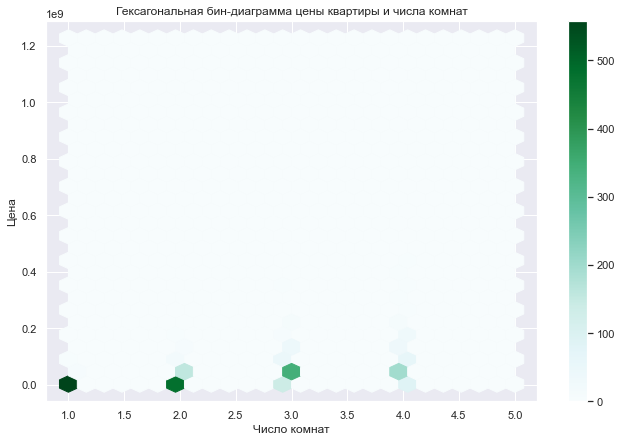

In [46]:
df.plot(x = 'rooms_count', y = 'price', kind = 'hexbin', gridsize = 25, figsize = (11, 7), sharex = False, grid=True)
plt.xlabel('–ß–∏—Å–ª–æ –∫–æ–º–Ω–∞—Ç')
plt.ylabel('–¶–µ–Ω–∞')
plt.title('–ì–µ–∫—Å–∞–≥–æ–Ω–∞–ª—å–Ω–∞—è –±–∏–Ω-–¥–∏–∞–≥—Ä–∞–º–º–∞ —Ü–µ–Ω—ã –∫–≤–∞—Ä—Ç–∏—Ä—ã –∏ —á–∏—Å–ª–∞ –∫–æ–º–Ω–∞—Ç');

–ú—ã –≤–∏–¥–∏–º, —á—Ç–æ –Ω–∞–∏–±–æ–ª–µ–µ —è—Ä–∫–æ –∑–∞–∫—Ä–∞—à–µ–Ω–Ω–∞—è —è—á–µ–π–∫–∞ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –æ–¥–Ω–æ–∫–æ–º–Ω–∞—Ç–Ω—ã–º –∫–≤–∞—Ä—Ç–∏—Ä–∞–º —Å —Ü–µ–Ω–æ–π –º–µ–Ω–µ–µ 100–º–ª–Ω (–ø–æ —à–∫–∞–ª–µ —Å –ø–ª–æ—Ç–Ω–æ—Å—Ç—å—é —Å–ø—Ä–∞–≤–∞ –º—ã –º–æ–∂–µ–º —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ —Ç–∞–∫–∏—Ö –∫–≤–∞—Ä—Ç–∏—Ä —Ç–æ—á–Ω–æ –±–æ–ª—å—à–µ 500). –¢–∞–∫–∂–µ –¥–æ–≤–æ–ª—å–Ω–æ –º–Ω–æ–≥–æ –∫–≤–∞—Ä—Ç–∏—Ä —Å 2 –∏ 3 –∫–æ–º–Ω–∞—Ç–∞–º–∏(–ø–ª–æ—Ç–Ω–æ—Å—Ç—å –ø—Ä–∏–±–ª–∏–∑–∏—Ç–µ–ª—å–Ω–æ 400 –∏ 300 —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ), –æ–Ω–∏ —Ç–∞–∫–∂–µ —Å—Ç–æ—è—Ç –º–µ–Ω—å—à–µ 100 –º–ª–Ω.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


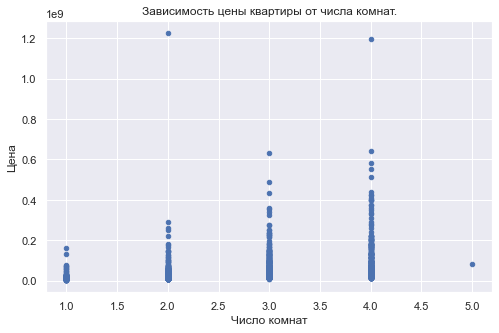

In [48]:
df.plot.scatter(x = 'rooms_count', y = 'price', figsize = (8, 5))
plt.xlabel('–ß–∏—Å–ª–æ –∫–æ–º–Ω–∞—Ç')
plt.ylabel('–¶–µ–Ω–∞')
plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –∫–≤–∞—Ä—Ç–∏—Ä—ã –æ—Ç —á–∏—Å–ª–∞ –∫–æ–º–Ω–∞—Ç.');

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º–µ–∂–¥—É –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –∫–æ–º–Ω–∞—Ç –∏ —Å—Ç–æ–∏–º–æ—Å—Ç—å—é –∫–≤–∞—Ä—Ç–∏—Ä—ã 0.38 - —É–º–µ—Ä–µ–Ω–Ω–∞—è —Å–≤—è–∑—å, —Ç–æ –µ—Å—Ç—å —Å —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º —á–∏—Å–ª–∞ –∫–æ–º–Ω–∞—Ç —Å—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä—ã —Ä–∞—Å—Ç—ë—Ç, –Ω–æ —ç—Ç–æ –Ω–µ –≥–ª–∞–≤–Ω—ã–π —Ñ–∞–∫—Ç–æ—Ä, –≤–ª–∏—è—é—â–∏–π –Ω–∞ –Ω–µ—ë.

–ò–∑—É—á–∏–º –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –∫–≤–∞—Ä—Ç–∏—Ä—ã –æ—Ç —Ü–µ–Ω—ã –∫–≤–∞–¥—Ä–∞—Ç–Ω–æ–≥–æ –º–µ—Ç—Ä–∞.

In [49]:
df['price'].corr(df['price_per_m2']).round(2)

0.87

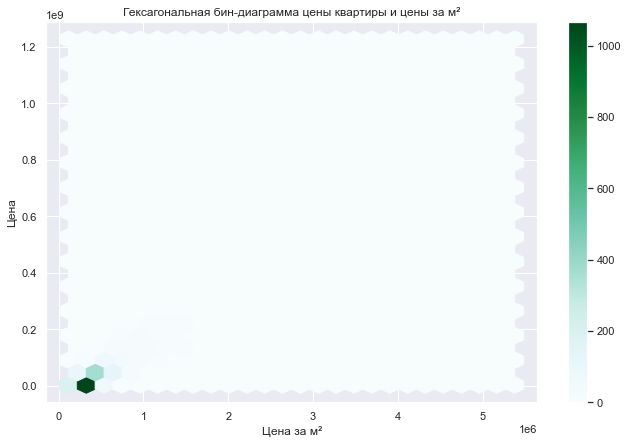

In [50]:
df.plot(x = 'price_per_m2', y = 'price', kind = 'hexbin', gridsize = 25, figsize = (11, 7), sharex = False, grid = True)
plt.xlabel('–¶–µ–Ω–∞ –∑–∞ –º¬≤')
plt.ylabel('–¶–µ–Ω–∞')
plt.title('–ì–µ–∫—Å–∞–≥–æ–Ω–∞–ª—å–Ω–∞—è –±–∏–Ω-–¥–∏–∞–≥—Ä–∞–º–º–∞ —Ü–µ–Ω—ã –∫–≤–∞—Ä—Ç–∏—Ä—ã –∏ —Ü–µ–Ω—ã –∑–∞ –º¬≤');

–ú—ã –≤–∏–¥–∏–º, —á—Ç–æ –Ω–∞–∏–±–æ–ª–µ–µ —è—Ä–∫–æ –∑–∞–∫—Ä–∞—à–µ–Ω–Ω–∞—è —è—á–µ–π–∫–∞ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –±–ª–∏–∑–∫–æ –∫ –Ω–∏–∂–Ω–µ–º—É –ª–µ–≤–æ–º—É —É–≥–ª—É –≥—Ä–∞—Ñ–∏–∫–∞, –∫–æ—Ç–æ—Ä—ã–π —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –±–æ–ª–µ–µ –Ω–∏–∑–∫–∏–º –∑–Ω–∞—á–µ–Ω–∏—è–º —Ü–µ–Ω—ã –∑–∞ –∫–≤–∞–¥—Ä–∞—Ç–Ω—ã–π –º–µ—Ç—Ä –∏ —Ü–µ–Ω—ã –∫–≤–∞—Ä—Ç–∏—Ä—ã. –≠—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ –Ω–∞–ª–∏—á–∏–µ –æ–ø—Ä–µ–¥–µ–ª—ë–Ω–Ω–æ–≥–æ —Å–µ–≥–º–µ–Ω—Ç–∞ —Ä—ã–Ω–∫–∞ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏, –≥–¥–µ —Ü–µ–Ω—ã –Ω–∞ –∫–≤–∞—Ä—Ç–∏—Ä—ã –∏ —Ü–µ–Ω–∞ –∑–∞ –∫–≤–∞–¥—Ä–∞—Ç–Ω—ã–π –º–µ—Ç—Ä —è–≤–ª—è—é—Ç—Å—è –Ω–∞–∏–±–æ–ª–µ–µ –¥–æ—Å—Ç—É–ø–Ω—ã–º–∏ –∏–ª–∏ –Ω–∏–∑–∫–∏–º–∏.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


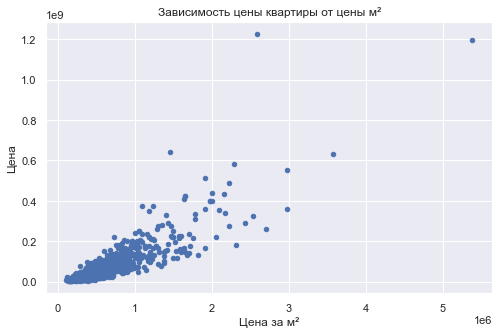

In [51]:
df.plot.scatter(x = 'price_per_m2', y = 'price', figsize = (8, 5))
plt.xlabel('–¶–µ–Ω–∞ –∑–∞ –º¬≤')
plt.ylabel('–¶–µ–Ω–∞')
plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –∫–≤–∞—Ä—Ç–∏—Ä—ã –æ—Ç —Ü–µ–Ω—ã –º¬≤');

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º–µ–∂–¥—É —Ü–µ–Ω—ã –º¬≤ –∏ —Å—Ç–æ–∏–º–æ—Å—Ç—å—é –∫–≤–∞—Ä—Ç–∏—Ä—ã 0.87 - –æ—á–µ–Ω—å —Å–∏–ª—å–Ω–∞—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è —Å–≤—è–∑—å, —Ç–æ –µ—Å—Ç—å —Å —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º —á–∏—Å–ª–∞ –∫–æ–º–Ω–∞—Ç —Å—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä—ã —Ä–∞—Å—Ç—ë—Ç.

–ò–∑—É—á–∏–º –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –∫–≤–∞—Ä—Ç–∏—Ä—ã –æ—Ç —É–¥–∞–ª—ë–Ω–Ω–æ—Å—Ç–∏ —Å—Ç–∞–Ω—Ü–∏–∏ –º–µ—Ç—Ä–æ –æ—Ç —Ü–µ–Ω—Ç—Ä–∞. –î–ª—è —ç—Ç–æ–≥–æ —Å–æ–∑–¥–∞–¥–∏–º –Ω–æ–≤—ã–π —Å—Ç–æ–ª–±–µ—Ü 'is_CAO' —Å –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏ —Å—Ç–æ–ª–±—Ü–∞ 'underground'.

In [52]:
# –°–æ–∑–¥–∞–¥–∏–º —Å–ø–∏—Å–æ–∫ —Å—Ç–∞–Ω—Ü–∏–π –º–µ—Ç—Ä–æ, –∫–æ—Ç–æ—Ä—ã–µ –æ—Ç–Ω–æ—Å—è—Ç—Å—è –∫ —Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω–æ–º—É –∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ç–∏–≤–Ω–æ–º—É –æ–∫—Ä—É–≥—É
CAO_underground = ['–†–∏–∂—Å–∫–∞—è', '–ü—Ä–æ—Å–ø–µ–∫—Ç –ú–∏—Ä–∞', '–°—É—Ö–∞—Ä–µ–≤—Å–∫–∞—è',
                   '–¢—É—Ä–≥–µ–Ω–µ–≤—Å–∫–∞—è', '–ö–∏—Ç–∞–π-–≥–æ—Ä–æ–¥', '–¢—Ä–µ—Ç—å—è–∫–æ–≤—Å–∫–∞—è',
                   '–û–∫—Ç—è–±—Ä—å—Å–∫–∞—è', '–ë–µ–ª–æ—Ä—É—Å—Å–∫–∞—è', '–ú–∞—è–∫–æ–≤—Å–∫–∞—è',
                   '–¢–≤–µ—Ä—Å–∫–∞—è', '–¢–µ–∞—Ç—Ä–∞–ª—å–Ω–∞—è', '–ù–æ–≤–æ–∫—É–∑–Ω–µ—Ü–∫–∞—è',
                   '–ü–∞–≤–µ–ª–µ—Ü–∫–∞—è', '–ü–ª–æ—â–∞–¥—å –ò–ª—å–∏—á–∞', '–ú–∞—Ä–∫—Å–∏—Å—Ç—Å–∫–∞—è',
                   '–¢—Ä–µ—Ç—å—è–∫–æ–≤—Å–∫–∞—è', '–ë–∞—É–º–∞–Ω—Å–∫–∞—è', '–ö—É—Ä—Å–∫–∞—è',
                   '–ü–ª–æ—â–∞–¥—å –†–µ–≤–æ–ª—é—Ü–∏–∏', '–ê—Ä–±–∞—Ç—Å–∫–∞—è', '–°–º–æ–ª–µ–Ω—Å–∫–∞—è',
                   '–ö—Ä–∞—Å–Ω–æ—Å–µ–ª—å—Å–∫–∞—è', '–ö–æ–º—Å–æ–º–æ–ª—å—Å–∫–∞—è', '–ö—Ä–∞—Å–Ω—ã–µ –í–æ—Ä–æ—Ç–∞',
                   '–ß–∏—Å—Ç—ã–µ –ü—Ä—É–¥—ã', '–õ—É–±—è–Ω–∫–∞','–û—Ö–æ—Ç–Ω—ã–π –†—è–¥', '–ë–∏–±–ª–∏–æ—Ç–µ–∫–∞ –∏–º. –õ–µ–Ω–∏–Ω–∞',
                   '–ü–∞—Ä–∫ –ö—É–ª—å—Ç—É—Ä—ã', '–§—Ä—É–Ω–∑–µ–Ω—Å–∫–∞—è', '–°–ø–æ—Ä—Ç–∏–≤–Ω–∞—è',
                   '–í–æ—Ä–æ–±—å–µ–≤—ã –ì–æ—Ä—ã', '–ö—Ä–æ–ø–æ—Ç–∫–∏–Ω—Å–∫–∞—è', '–°–º–æ–ª–µ–Ω—Å–∫–∞—è',
                   '–ê—Ä–±–∞—Ç—Å–∫–∞—è', '–ê–ª–µ–∫—Å–∞–Ω–¥—Ä–æ–≤—Å–∫–∏–π –°–∞–¥', '–ü—Ä–æ—Å–ø–µ–∫—Ç –ú–∏—Ä–∞',
                   '–ö–æ–º—Å–æ–º–æ–ª—å—Å–∫–∞—è', '–ö—É—Ä—Å–∫–∞—è', '–¢–∞–≥–∞–Ω—Å–∫–∞—è', '–ü–∞–≤–µ–ª–µ—Ü–∫–∞—è',
                   '–î–æ–±—Ä—ã–Ω–∏–Ω—Å–∫–∞—è', '–û–∫—Ç—è–±—Ä—å—Å–∫–∞—è', '–ü–∞—Ä–∫ –ö—É–ª—å—Ç—É—Ä—ã',
                   '–ö—Ä–∞—Å–Ω–æ–ø—Ä–µ—Å–Ω–µ–Ω—Å–∫–∞—è', '–ë–µ–ª–æ—Ä—É—Å—Å–∫–∞—è', '–ù–æ–≤–æ—Å–ª–æ–±–æ–¥—Å–∫–∞—è',
                   '–£–ª–∏—Ü–∞ 1905 –≥–æ–¥–∞', '–ë–∞—Ä—Ä–∏–∫–∞–¥–Ω–∞—è', '–ü—É—à–∫–∏–Ω—Å–∫–∞—è',
                   '–ö—É–∑–Ω–µ—Ü–∫–∏–π –ú–æ—Å—Ç', '–ö–∏—Ç–∞–π-–≥–æ—Ä–æ–¥', '–ü—Ä–æ–ª–µ—Ç–∞—Ä—Å–∫–∞—è',
                   '–¢–∞–≥–∞–Ω—Å–∫–∞—è', '–ú–µ–Ω–¥–µ–ª–µ–µ–≤—Å–∫–∞—è', '–¶–≤–µ—Ç–Ω–æ–π –ë—É–ª—å–≤–∞—Ä',
                   '–ß–µ—Ö–æ–≤—Å–∫–∞—è', '–ë–æ—Ä–æ–≤–∏—Ü–∫–∞—è', '–ü–æ–ª—è–Ω–∫–∞', '–°–µ—Ä–ø—É—Ö–æ–≤—Å–∫–∞—è']

In [53]:
df['is_CAO'] = df['underground'].apply(lambda x: 1 if x in CAO_underground else 0)

In [54]:
df['price'].corr(df['is_CAO']).round(2)

0.45

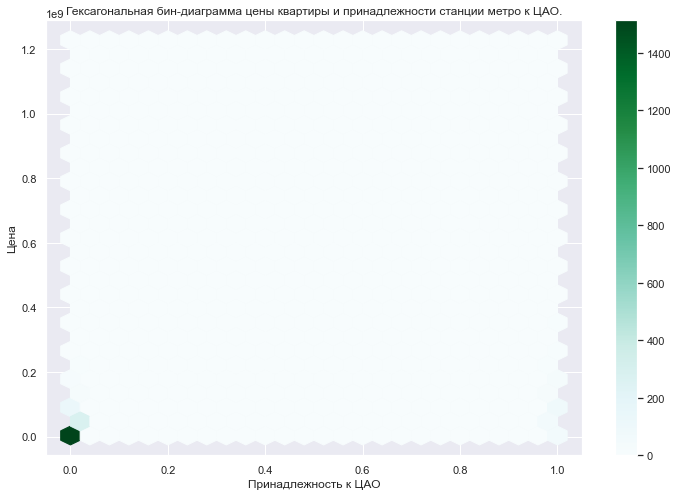

In [55]:
df.plot(x = 'is_CAO', y = 'price', kind = 'hexbin', gridsize = 25, figsize = (12, 8), sharex = False, grid = True)
plt.xlabel('–ü—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç—å –∫ –¶–ê–û')
plt.ylabel('–¶–µ–Ω–∞')
plt.title('–ì–µ–∫—Å–∞–≥–æ–Ω–∞–ª—å–Ω–∞—è –±–∏–Ω-–¥–∏–∞–≥—Ä–∞–º–º–∞ —Ü–µ–Ω—ã –∫–≤–∞—Ä—Ç–∏—Ä—ã –∏ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ —Å—Ç–∞–Ω—Ü–∏–∏ –º–µ—Ç—Ä–æ –∫ –¶–ê–û.');

–ú—ã –≤–∏–¥–∏–º, —á—Ç–æ –Ω–∞–∏–±–æ–ª–µ–µ —è—Ä–∫–æ –∑–∞–∫—Ä–∞—à–µ–Ω–Ω–∞—è —è—á–µ–π–∫–∞ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –Ω–∏–∑–∫–æ–º—É –∑–Ω–∞—á–µ–Ω–∏—é —Ü–µ–Ω –∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –∫–≤–∞—Ä—Ç–∏—Ä, –∫–æ—Ç–æ—Ä—ã–µ –Ω–∞—Ö–æ–¥—è—Ç—Å—è –Ω–∞ —Å—Ç–∞–Ω—Ü–∏—è—Ö –º–µ—Ç—Ä–æ, –Ω–µ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–∞—â–∏—Ö –¶–ê–û. –≠—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ —Ç–æ, —á—Ç–æ –±–æ–ª–µ–µ —É–¥–∞–ª—ë–Ω–Ω—ã–µ –æ—Ç —Ü–µ–Ω—Ç—Ä–∞ –∫–≤–∞—Ä—Ç–∏—Ä—ã –∏–º–µ—é—Ç –º–µ–Ω—å—à—É—é —Å—Ç–æ–∏–º–æ—Å—Ç—å.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


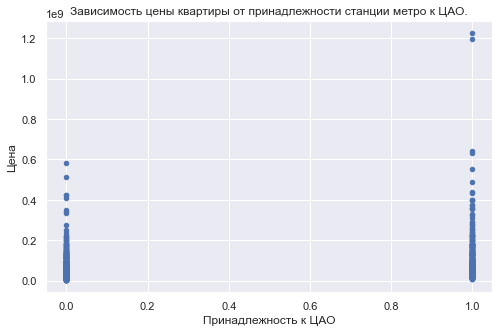

In [56]:
df.plot.scatter(x = 'is_CAO', y = 'price', figsize = (8, 5))
plt.xlabel('–ü—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç—å –∫ –¶–ê–û')
plt.ylabel('–¶–µ–Ω–∞')
plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –∫–≤–∞—Ä—Ç–∏—Ä—ã –æ—Ç –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ —Å—Ç–∞–Ω—Ü–∏–∏ –º–µ—Ç—Ä–æ –∫ –¶–ê–û.');

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º–µ–∂–¥—É –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –∫–æ–º–Ω–∞—Ç –∏ —Å—Ç–æ–∏–º–æ—Å—Ç—å—é –∫–≤–∞—Ä—Ç–∏—Ä—ã 0.45 - —É–º–µ—Ä–µ–Ω–Ω–∞—è —Å–≤—è–∑—å, —Ç–æ –µ—Å—Ç—å —á–µ–º –±–ª–∏–∂–µ —Å—Ç–∞–Ω—Ü–∏—è –º–µ—Ç—Ä–æ, —Ç–µ–º –≤—ã—à–µ —Å—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä—ã, –Ω–æ —ç—Ç–æ –Ω–µ –≥–ª–∞–≤–Ω—ã–π —Ñ–∞–∫—Ç–æ—Ä, –≤–ª–∏—è—é—â–∏–π –Ω–∞ –Ω–µ—ë.

–ò–∑—É—á–∏–º –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –∫–≤–∞—Ä—Ç–∏—Ä—ã –æ—Ç –≥–æ–¥–∞ –ø–æ—Å—Ç—Ä–æ–π–∫–∏ –¥–æ–º–∞.

In [57]:
df['price'].corr(df['year_of_construction']).round(2)

0.14

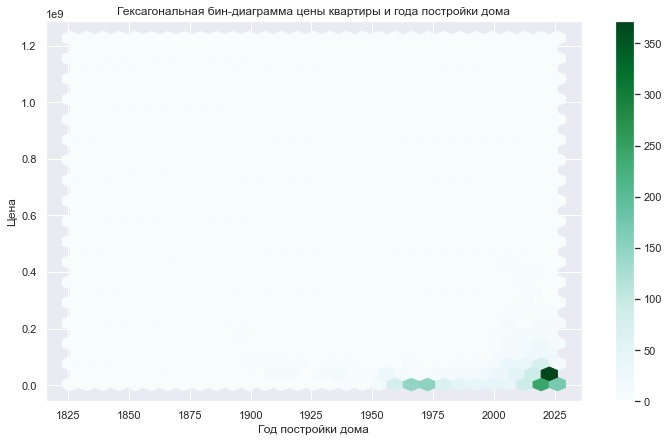

In [58]:
df.plot(x = 'year_of_construction', y = 'price', kind = 'hexbin', gridsize = 30, figsize = (12, 7), sharex = False, grid=True)
plt.xlabel('–ì–æ–¥ –ø–æ—Å—Ç—Ä–æ–π–∫–∏ –¥–æ–º–∞')
plt.ylabel('–¶–µ–Ω–∞')
plt.title('–ì–µ–∫—Å–∞–≥–æ–Ω–∞–ª—å–Ω–∞—è –±–∏–Ω-–¥–∏–∞–≥—Ä–∞–º–º–∞ —Ü–µ–Ω—ã –∫–≤–∞—Ä—Ç–∏—Ä—ã –∏ –≥–æ–¥–∞ –ø–æ—Å—Ç—Ä–æ–π–∫–∏ –¥–æ–º–∞');

–°–∞–º—ã–µ —Å–∏–ª—å–Ω–æ –∑–∞–∫—Ä–∞—à–µ–Ω–Ω—ã–µ —è—á–µ–π–∫–∏ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω—ã –≤ –ø—Ä–∞–≤–æ–º –Ω–∏–∂–Ω–µ–º —É–≥–ª—É, –ø—Ä–∏ —ç—Ç–æ–º —è—á–µ–π–∫–∞ —Å –Ω–∞–∏–±–æ–ª—å—à–µ–π –ø–ª–æ—Ç–Ω–æ—Å—Ç—å—é —Ä–∞—Å–ø–æ–ª–∞–≥–∞–µ—Ç—Å—è –≤—ã—à–µ, —á–µ–º –≤—Å–µ —è—á–µ–π–∫–∏ –¥–ª—è –±–æ–ª–µ–µ —Å—Ç–∞—Ä—ã—Ö –¥–æ–º–æ–≤(—ç—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –±–æ–ª—å—à—É—é —Å—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä). –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º,–±–æ–ª–µ–µ –Ω–æ–≤—ã–µ –¥–æ–º–∞ –∏–º–µ—é—Ç –±–æ–ª–µ–µ –≤—ã—Å–æ–∫—É—é —Å—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä.

–¢–∞–∫–æ–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏–µ –º–æ–∂–µ—Ç –∏–º–µ—Ç—å —Å–º—ã—Å–ª, —Ç–∞–∫ –∫–∞–∫ –Ω–æ–≤—ã–µ –¥–æ–º–∞ —á–∞—Å—Ç–æ –∏–º–µ—é—Ç —Å–æ–≤—Ä–µ–º–µ–Ω–Ω—ã–µ —É–¥–æ–±—Å—Ç–≤–∞, –ª—É—á—à—É—é –∏–∑–æ–ª—è—Ü–∏—é, —Å–æ–≤—Ä–µ–º–µ–Ω–Ω—ã–π –¥–∏–∑–∞–π–Ω –∏ –¥—Ä—É–≥–∏–µ –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥—É—Ç –ø–æ–≤—ã—Å–∏—Ç—å –∏—Ö —Å—Ç–æ–∏–º–æ—Å—Ç—å. –ë–æ–ª–µ–µ —Å—Ç–∞—Ä—ã–µ –¥–æ–º–∞ –º–æ–≥—É—Ç —Ç—Ä–µ–±–æ–≤–∞—Ç—å —Ä–µ–º–æ–Ω—Ç–∞ –∏–ª–∏ –æ–±–Ω–æ–≤–ª–µ–Ω–∏—è, —á—Ç–æ –º–æ–∂–µ—Ç —Å–∫–∞–∑—ã–≤–∞—Ç—å—Å—è –Ω–∞ —Ü–µ–Ω–µ –∫–≤–∞—Ä—Ç–∏—Ä –≤ –Ω–∏—Ö.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


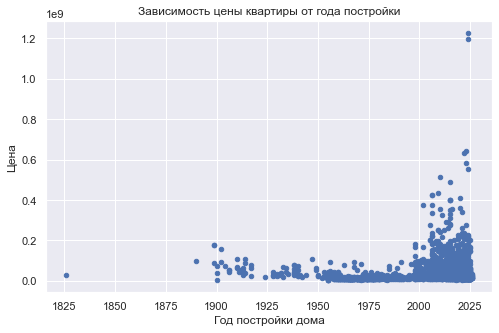

In [60]:
df.plot.scatter(x = 'year_of_construction', y = 'price', figsize = (8, 5))
plt.xlabel('–ì–æ–¥ –ø–æ—Å—Ç—Ä–æ–π–∫–∏ –¥–æ–º–∞')
plt.ylabel('–¶–µ–Ω–∞')
plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –∫–≤–∞—Ä—Ç–∏—Ä—ã –æ—Ç –≥–æ–¥–∞ –ø–æ—Å—Ç—Ä–æ–π–∫–∏');

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º–µ–∂–¥—É –≥–æ–¥–æ–º –ø–æ—Å—Ç—Ä–æ–π–∫–∏ –¥–æ–º–∞ –∏ —Å—Ç–æ–∏–º–æ—Å—Ç—å—é –∫–≤–∞—Ä—Ç–∏—Ä—ã 0.14 - —Å–ª–∞–±–∞—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è —Å–≤—è–∑—å, —Ç–æ –µ—Å—Ç—å —ç—Ç–æ –Ω–µ –≥–ª–∞–≤–Ω—ã–π —Ñ–∞–∫—Ç–æ—Ä, –≤–ª–∏—è—é—â–∏–π –Ω–∞ —Å—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä—ã.

–ò–∑—É—á–∏–º –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –∫–≤–∞—Ä—Ç–∏—Ä—ã –æ—Ç —ç—Ç–∞–∂–∞.

In [61]:
df['price'].corr(df['floor']).round(2)

0.1

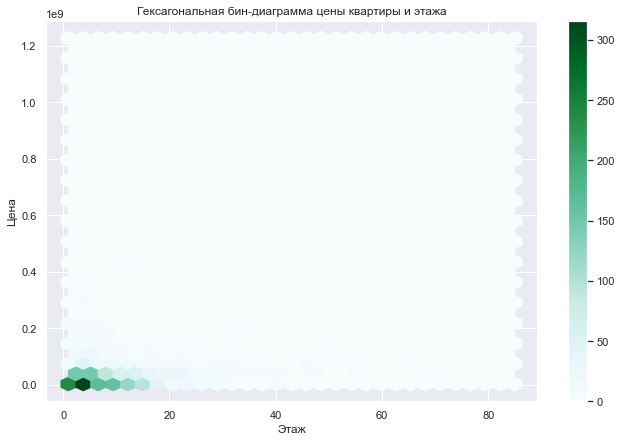

In [62]:
df.plot(x = 'floor', y = 'price', kind = 'hexbin', gridsize = 30, figsize = (11, 7), sharex = False, grid=True)
plt.xlabel('–≠—Ç–∞–∂')
plt.ylabel('–¶–µ–Ω–∞')
plt.title('–ì–µ–∫—Å–∞–≥–æ–Ω–∞–ª—å–Ω–∞—è –±–∏–Ω-–¥–∏–∞–≥—Ä–∞–º–º–∞ —Ü–µ–Ω—ã –∫–≤–∞—Ä—Ç–∏—Ä—ã –∏ —ç—Ç–∞–∂–∞');

–°–∞–º—ã–µ —Å–∏–ª—å–Ω–æ –∑–∞–∫—Ä–∞—à–µ–Ω–Ω—ã–µ —è—á–µ–π–∫–∏ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω—ã –≤ –Ω–∏–∂–Ω–µ–º –ª–µ–≤–æ–º —É–≥–ª—É, —ç—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ —Å–ª–µ–¥—É—é—â—É—é –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç—å: —Ü–µ–Ω—ã –Ω–∞ –∫–≤–∞—Ä—Ç–∏—Ä—ã –º–æ–≥—É—Ç –±—ã—Ç—å –Ω–∏–∂–µ –≤ —Å–ª—É—á–∞–µ, –∫–æ–≥–¥–∞ –∫–≤–∞—Ä—Ç–∏—Ä–∞ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∞ –Ω–∞ –Ω–∏–∂–Ω–∏—Ö —ç—Ç–∞–∂–∞—Ö.

–¢–∞–∫–æ–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏–µ –º–æ–∂–µ—Ç –∏–º–µ—Ç—å —Å–º—ã—Å–ª, —Ç–∞–∫ –∫–∞–∫ –∫–≤–∞—Ä—Ç–∏—Ä—ã –Ω–∞ –Ω–∏–∂–Ω–∏—Ö —ç—Ç–∞–∂–∞—Ö –º–æ–≥—É—Ç –∏–º–µ—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –Ω–µ–¥–æ—Å—Ç–∞—Ç–∫–∏ –∏–ª–∏ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏—è, –∫–æ—Ç–æ—Ä—ã–µ –≤–ª–∏—è—é—Ç –Ω–∞ –∏—Ö —Å—Ç–æ–∏–º–æ—Å—Ç—å. –ù–∞–ø—Ä–∏–º–µ—Ä, –∫–≤–∞—Ä—Ç–∏—Ä—ã –Ω–∞ –ø–µ—Ä–≤–æ–º —ç—Ç–∞–∂–µ –º–æ–≥—É—Ç –∏–º–µ—Ç—å –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω—ã–π –≤–∏–¥, –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–π —É—Ä–æ–≤–µ–Ω—å —à—É–º–∞ –∏–ª–∏ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω—É—é –ø—Ä–∏–≤–∞—Ç–Ω–æ—Å—Ç—å. –í —Ç–æ –≤—Ä–µ–º—è –∫–∞–∫ –∫–≤–∞—Ä—Ç–∏—Ä—ã –Ω–∞ –≤–µ—Ä—Ö–Ω–∏—Ö —ç—Ç–∞–∂–∞—Ö –º–æ–≥—É—Ç –∏–º–µ—Ç—å –ª—É—á—à–∏–π –≤–∏–¥ –∏ –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–π —É—Ä–æ–≤–µ–Ω—å –ø—Ä–∏–≤–∞—Ç–Ω–æ—Å—Ç–∏, —á—Ç–æ –º–æ–∂–µ—Ç –ø–æ–≤—ã—Å–∏—Ç—å –∏—Ö —Å—Ç–æ–∏–º–æ—Å—Ç—å.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


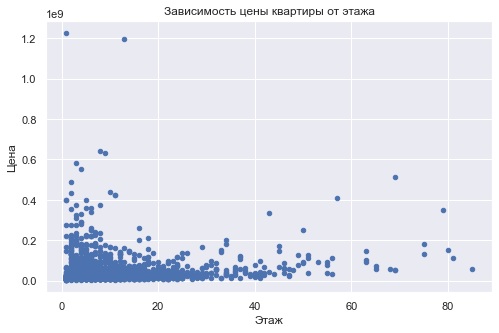

In [63]:
df.plot.scatter(x = 'floor', y = 'price', figsize = (8, 5))
plt.xlabel('–≠—Ç–∞–∂')
plt.ylabel('–¶–µ–Ω–∞')
plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –∫–≤–∞—Ä—Ç–∏—Ä—ã –æ—Ç —ç—Ç–∞–∂–∞');

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º–µ–∂–¥—É –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º —ç—Ç–∞–∂–µ–π –∏ —Å—Ç–æ–∏–º–æ—Å—Ç—å—é –∫–≤–∞—Ä—Ç–∏—Ä—ã 0.1 - –æ—á–µ–Ω—å —Å–ª–∞–±–∞—è —Å–≤—è–∑—å, —Ç–æ –µ—Å—Ç—å —ç—Ç–æ –Ω–µ –≥–ª–∞–≤–Ω—ã–π —Ñ–∞–∫—Ç–æ—Ä, –≤–ª–∏—è—é—â–∏–π –Ω–∞ —Å—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä—ã.

–ò–∑—É—á–∏–º –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –∫–≤–∞—Ä—Ç–∏—Ä—ã –æ—Ç –æ–±—â–µ–π —ç—Ç–∞–∂–Ω–æ—Å—Ç–∏ –¥–æ–º–∞.

In [64]:
df['price'].corr(df['floors_count']).round(2)

0.04

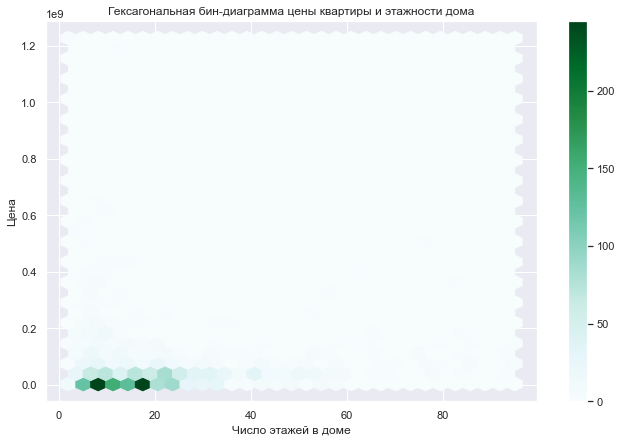

In [65]:
df.plot(x = 'floors_count', y = 'price', kind = 'hexbin', gridsize = 30, figsize = (11, 7), sharex = False, grid=True)
plt.xlabel('–ß–∏—Å–ª–æ —ç—Ç–∞–∂–µ–π –≤ –¥–æ–º–µ')
plt.ylabel('–¶–µ–Ω–∞')
plt.title('–ì–µ–∫—Å–∞–≥–æ–Ω–∞–ª—å–Ω–∞—è –±–∏–Ω-–¥–∏–∞–≥—Ä–∞–º–º–∞ —Ü–µ–Ω—ã –∫–≤–∞—Ä—Ç–∏—Ä—ã –∏ —ç—Ç–∞–∂–Ω–æ—Å—Ç–∏ –¥–æ–º–∞');

–°–∞–º—ã–µ —Å–∏–ª—å–Ω–æ –∑–∞–∫—Ä–∞—à–µ–Ω–Ω—ã–µ —è—á–µ–π–∫–∏ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω—ã –≤ –Ω–∏–∂–Ω–µ–º –ª–µ–≤–æ–º —É–≥–ª—É (–≤ –ø—Ä–æ–º–µ–∂—É—Ç–∫–µ –¥–æ 20 –ø–æ –æ—Å–∏ x), —ç—Ç–æ –º–æ–∂–µ—Ç —É–∫–∞–∑—ã–≤–∞—Ç—å –Ω–∞ —Å–ª–µ–¥—É—é—â—É—é –∑–∞–∫–æ–Ω–æ–º–µ—Ä–Ω–æ—Å—Ç—å: —Ü–µ–Ω—ã –Ω–∞ –∫–≤–∞—Ä—Ç–∏—Ä—ã –º–æ–≥—É—Ç –±—ã—Ç—å –Ω–∏–∂–µ –≤ —Å–ª—É—á–∞–µ, –∫–æ–≥–¥–∞ –¥–æ–º –∏–º–µ–µ—Ç –Ω–µ–±–æ–ª—å—à—É—é —ç—Ç–∞–∂–Ω–æ—Å—Ç—å (–¥–æ 20 —ç—Ç–∞–∂–µ–π).

–¢–∞–∫–æ–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏–µ –º–æ–∂–µ—Ç –∏–º–µ—Ç—å —Å–º—ã—Å–ª, —Ç–∞–∫ –∫–∞–∫ –≤ –Ω–µ–±–æ–ª—å—à–∏—Ö –¥–æ–º–∞—Ö –æ–±—ã—á–Ω–æ –º–µ–Ω—å—à–µ –∫–≤–∞—Ä—Ç–∏—Ä, —á—Ç–æ –º–æ–∂–µ—Ç —Å–æ–∑–¥–∞–≤–∞—Ç—å –º–µ–Ω—å—à—É—é –∫–æ–Ω–∫—É—Ä–µ–Ω—Ü–∏—é —Å—Ä–µ–¥–∏ –ø–æ–∫—É–ø–∞—Ç–µ–ª–µ–π –∏ –≤–ª–∏—è—Ç—å –Ω–∞ —Ü–µ–Ω—ã. –ö—Ä–æ–º–µ —Ç–æ–≥–æ, –±–æ–ª–µ–µ –∫—Ä—É–ø–Ω—ã–µ –º–Ω–æ–≥–æ—ç—Ç–∞–∂–Ω—ã–µ –¥–æ–º–∞ –º–æ–≥—É—Ç –∏–º–µ—Ç—å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ —É–¥–æ–±—Å—Ç–≤–∞ –∏ —É—Å–ª—É–≥–∏, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥—É—Ç –ø–æ–≤—ã—Å–∏—Ç—å —Å—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


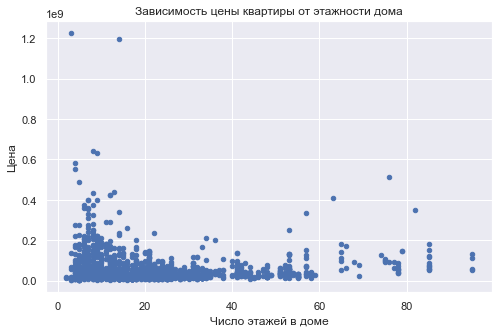

In [66]:
df.plot.scatter(x = 'floors_count', y = 'price', figsize = (8, 5))
plt.xlabel('–ß–∏—Å–ª–æ —ç—Ç–∞–∂–µ–π –≤ –¥–æ–º–µ')
plt.ylabel('–¶–µ–Ω–∞')
plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –∫–≤–∞—Ä—Ç–∏—Ä—ã –æ—Ç —ç—Ç–∞–∂–Ω–æ—Å—Ç–∏ –¥–æ–º–∞');

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º–µ–∂–¥—É –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º —ç—Ç–∞–∂–µ–π –≤ –¥–æ–º–µ –∏ —Å—Ç–æ–∏–º–æ—Å—Ç—å—é –∫–≤–∞—Ä—Ç–∏—Ä—ã 0.04 - –æ—á–µ–Ω—å —Å–ª–∞–±–∞—è —Å–≤—è–∑—å, —Ç–æ –µ—Å—Ç—å —ç—Ç–æ –Ω–µ –≥–ª–∞–≤–Ω—ã–π —Ñ–∞–∫—Ç–æ—Ä, –≤–ª–∏—è—é—â–∏–π –Ω–∞ —Å—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä—ã.

## –°–æ–∑–¥–∞–Ω–∏–µ –Ω–æ–≤—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö

–ü–æ–º–∏–º–æ —Ä–∞–Ω–µ–µ —Å–æ–∑–¥–∞–Ω–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π "is_CAO" —Å–æ–∑–¥–∞–¥–∏–º –µ—â—ë –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö, –∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–∏–≥–æ–¥—è—Ç—Å—è –Ω–∞–º –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞.

1) —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∂–∏–ª–æ–π –ø–ª–æ—â–∞–¥–∏ –∏ –ø–ª–æ—â–∞–¥–∏ –∫—É—Ö–Ω–∏

2) –∫–∞—Ç–µ–≥–æ—Ä–∏—è –¥–æ–º–∞ (—Å—Ç–∞–ª–∏–Ω–∫–∞, —Ö—Ä—É—â—ë–≤–∫–∞, –±—Ä–µ–∂–Ω–µ–≤–∫–∞, –º–æ–Ω–æ–ª–∏—Ç–Ω—ã–π –¥–æ–º, –Ω–æ–≤–æ—Å—Ç—Ä–æ–π–∫–∞)

In [233]:
df['area_ratio'] = (df['living_meters'] / df ['kitchen_meters']).round(2)

In [234]:
def class_of_house(row):
    if 1820 <= row['year_of_construction'] < 1840:
        typ = '–§–∏–ª–∞–Ω–æ–≤—Å–∫–∏–π'
    elif 1840 <= row['year_of_construction'] < 1855:
        typ = '–ù–∏–∫–∏—Ç–∏–Ω—Å–∫–∏–π'
    elif 1855 <= row['year_of_construction'] < 1870:
        typ = '–ö–æ–≤–∞–ª—ë–≤—Å–∫–∏–π'
    elif 1870 <= row['year_of_construction'] < 1940:
        typ = '–ü–µ—á–∞—Ç–Ω–∏–∫–∏'
    elif 1940 <= row['year_of_construction'] < 1950:
        typ = '–°—Ç–∞–ª–∏–Ω–∫–∞'
    elif 1950 <= row['year_of_construction'] < 1960:
        typ = '–•—Ä—É—â—ë–≤–∫–∞'
    elif 1960 <= row['year_of_construction'] < 1980:
        typ = '–ë—Ä–µ–∂–Ω–µ–≤–∫–∞'
    elif 1980 <= row['year_of_construction'] < 2018:
        typ = '–ú–æ–Ω–æ–ª–∏—Ç–Ω—ã–π'
    else :
        typ = '–ù–æ–≤–æ—Å—Ç—Ä–æ–π–∫–∞'
    return typ

df['house_category'] = df.apply (class_of_house, axis=1)

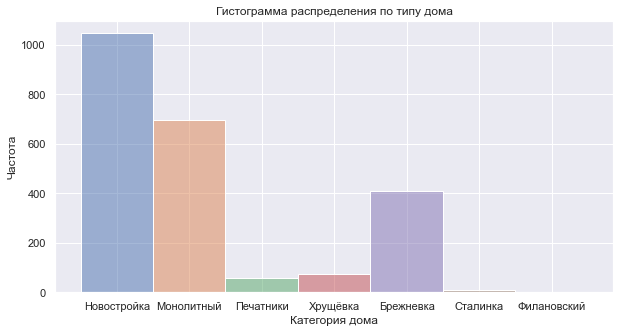

In [235]:
sns.set(rc = {'figure.figsize' : (10, 5)})
sns.histplot(x = 'house_category', hue = 'house_category', legend = False, data = df, bins = 50)
plt.xlabel('–ö–∞—Ç–µ–≥–æ—Ä–∏—è –¥–æ–º–∞')
plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
plt.title('–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–æ —Ç–∏–ø—É –¥–æ–º–∞');

–í –Ω–∞—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö —á–∞—â–µ –≤—Å–µ–≥–æ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –Ω–æ–≤–æ—Å—Ç—Ä–æ–π–∫–∏ –∏ –º–æ–Ω–æ–ª–∏—Ç–Ω—ã–µ –¥–æ–º–∞.

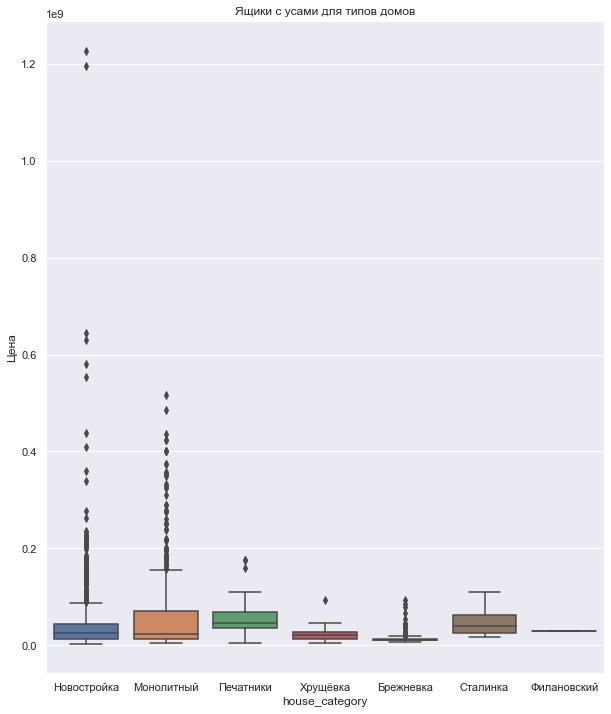

In [236]:
sns.set(rc = {'figure.figsize' : (10, 12)})
sns.boxplot(y = df.price, x = df['house_category'])
plt.ylabel('–¶–µ–Ω–∞')
plt.title('–Ø—â–∏–∫–∏ —Å —É—Å–∞–º–∏ –¥–ª—è —Ç–∏–ø–æ–≤ –¥–æ–º–æ–≤');

–ò–∑ –¥–∞–Ω–Ω—ã—Ö –≥—Ä–∞—Ñ–∏–∫–∞ –º—ã –º–æ–∂–µ–º —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥ –æ —Ç–æ–º, —á—Ç–æ –ø–µ—á–∞—Ç–Ω–∏–∫–∏ –∏ —Å—Ç–∞–ª–∏–Ω–∫–∏ —Ü–µ–Ω—è—Ç—Å—è –±–æ–ª—å—à–µ, —á–µ–º –¥—Ä—É–≥–∏–µ —Ç–∏–ø—ã –¥–æ–º–æ–≤ (–æ–± —ç—Ç–æ–º –≥–æ–≤–æ—Ä–∏—Ç —É—Ä–æ–≤–µ–Ω—å –º–µ–¥–∏–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π), —Ç–∞–∫–∏–µ –æ—Ç–ª–∏—á–∏—è –º–æ–≥—É—Ç –±—ã—Ç—å —Å–≤—è–∑–∞–Ω—ã —Å —Ä–∞–∑–ª–∏—á–∏—è–º–∏ –≤ –∫–∞—á–µ—Å—Ç–≤–µ –∂–∏–ª—å—è –∏ –∏–Ω—Ñ—Ä–∞—Å—Ç—Ä—É–∫—Ç—É—Ä–µ –≤–æ–∫—Ä—É–≥ –¥–æ–º–æ–≤ —Ä–∞–∑–Ω—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π.

–°–∞–º–∞—è –±–æ–ª—å—à–∞—è –≤–∞—Ä–∏–∞—Ç–∏–≤–Ω–æ—Å—Ç—å –Ω–∞ –∫–≤–∞—Ä—Ç–∏—Ä—ã –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –≤ –º–æ–Ω–æ–ª–∏—Ç–Ω—ã—Ö –¥–æ–º–∞—Ö, —á—Ç–æ –º–æ–∂–Ω–æ —É–≤–∏–¥–µ—Ç—å –ø–æ —Ä–∞–∑–º–∞—Ö—É –º–µ–∂–¥—É –≤–µ—Ä—Ö–Ω–∏–º –∏ –Ω–∏–∂–Ω–∏–º –∫–≤–∞—Ä—Ç–∏–ª—è–º–∏, –∞ —Ç–∞–∫–∂–µ –ø–æ –≤—ã–±—Ä–æ—Å–∞–º –∑–∞ –ø—Ä–µ–¥–µ–ª–∞–º–∏ —É—Å–æ–≤.

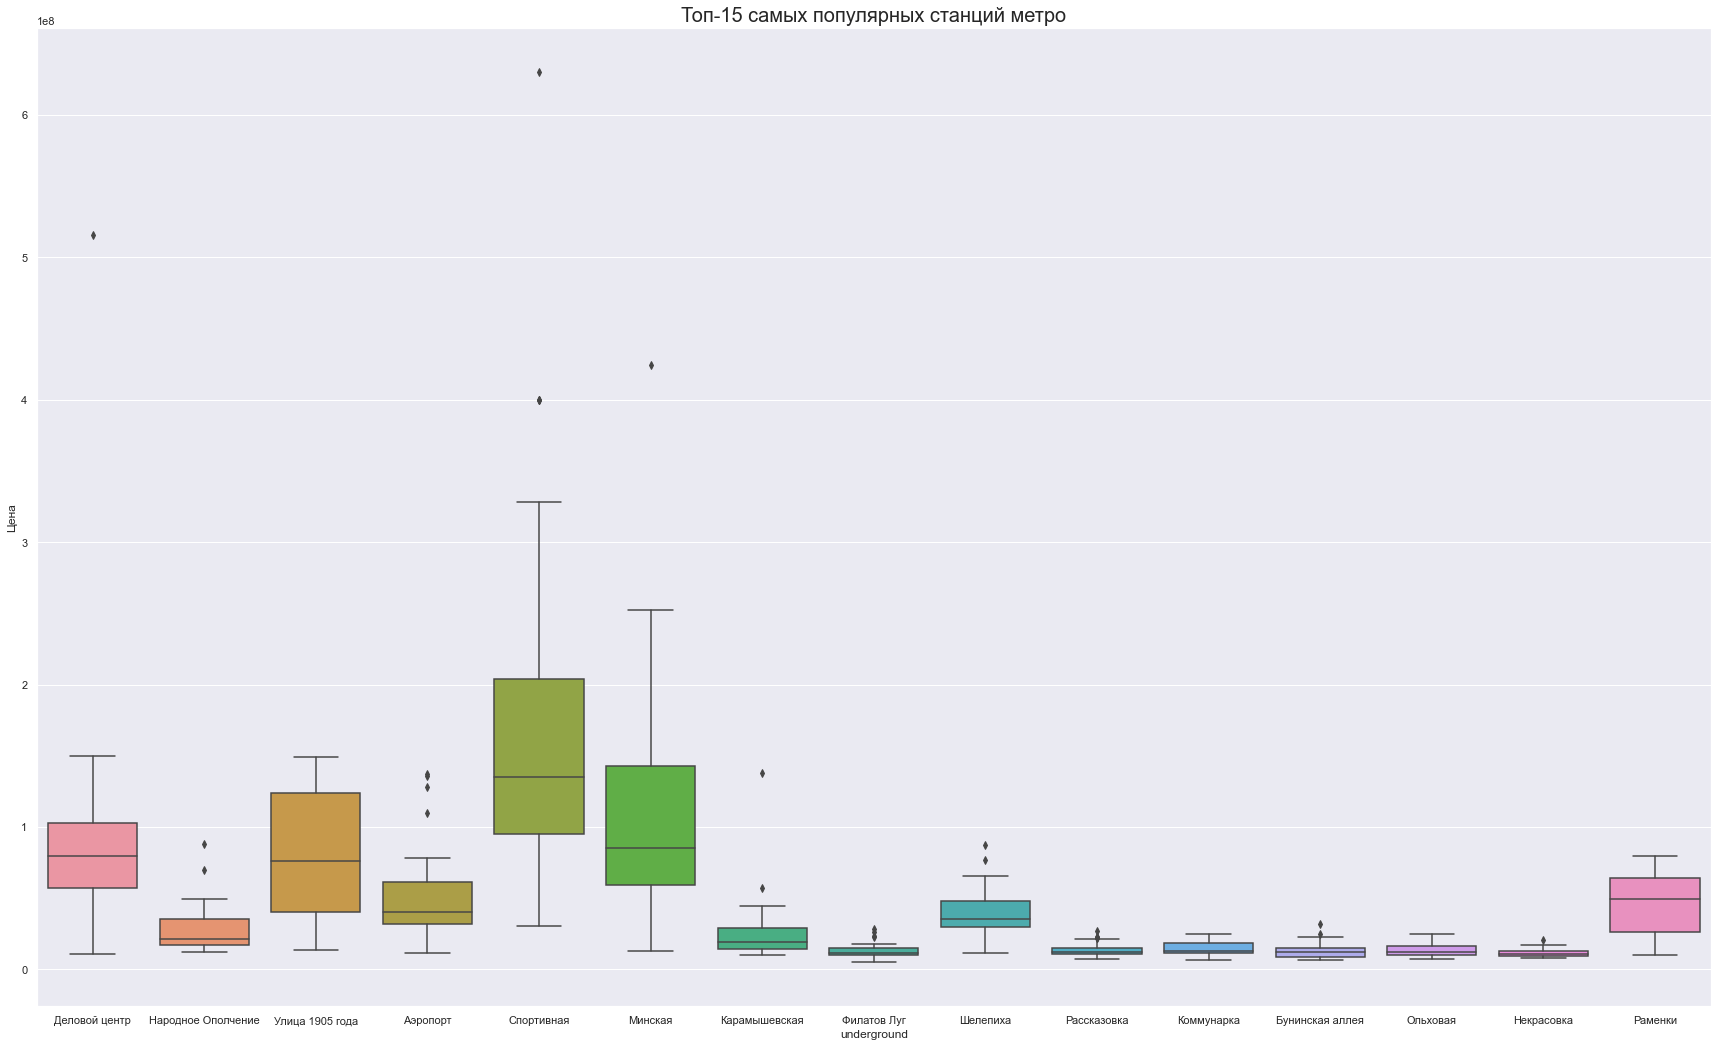

In [237]:
sns.set(rc = {'figure.figsize' : (30, 18)})
sns.boxplot(y = df[df.underground.isin(list(df.underground.value_counts().head(15).index))].price,
            x = df[df.underground.isin(list(df.underground.value_counts().head(15).index))].underground)
plt.ylabel('–¶–µ–Ω–∞')
plt.title('–¢–æ–ø-15 —Å–∞–º—ã—Ö –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö —Å—Ç–∞–Ω—Ü–∏–π –º–µ—Ç—Ä–æ', size = 20);

–ü–æ –≥—Ä–∞—Ñ–∏–∫–∞–º –º–æ–∂–Ω–æ —É–≤–∏–¥–µ—Ç—å, —á—Ç–æ —Å–∞–º—ã–µ –Ω–∏–∑–∫–∏–µ —Ü–µ–Ω—ã –Ω–∞ —Å—Ç–∞–Ω—Ü–∏–∏ –ù–µ–∫—Ä–∞—Å–æ–≤–∫–∞, –∞ —Å–∞–º—ã–µ –≤—ã—Å–æ–∫–∏–µ –Ω–∞ –°–ø–æ—Ä—Ç–∏–≤–Ω–æ–π, –ú–∏–Ω—Å–∫–æ–π, –î–µ–ª–æ–≤–æ–º —Ü–µ–Ω—Ç—Ä–µ.

–í–∞—Ä–∏–∞—Ç–∏–≤–Ω–æ—Å—Ç—å —Ü–µ–Ω –Ω–∞ –∫–≤–∞—Ä—Ç–∏—Ä—ã –Ω–∞ —Å—Ç–∞–Ω—Ü–∏—è—Ö –º–µ—Ç—Ä–æ –°–ø–æ—Ä—Ç–∏–≤–Ω–∞—è –∏ –ú–∏–Ω—Å–∫–∞—è –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±–æ–ª—å—à–∞—è, –∫–∞–∫ —ç—Ç–æ –≤–∏–¥–Ω–æ –ø–æ —Ä–∞–∑–º–∞—Ö—É –º–µ–∂–¥—É –≤–µ—Ä—Ö–Ω–∏–º –∏ –Ω–∏–∂–Ω–∏–º –∫–≤–∞—Ä—Ç–∏–ª—è–º–∏, –∞ —Ç–∞–∫–∂–µ –ø–æ –Ω–∞–ª–∏—á–∏—é –≤—ã–±—Ä–æ—Å–æ–≤ –∑–∞ –ø—Ä–µ–¥–µ–ª–∞–º–∏ —É—Å–æ–≤.

–î–æ–≤–æ–ª—å–Ω–æ —Å—Ö–æ–∂–µ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–Ω –Ω–∞ –∫–≤–∞—Ä—Ç–∏—Ä—ã –Ω–∞ —Å—Ç–∞–Ω—Ü–∏—è—Ö –î–µ–ª–æ–≤–æ–π —Ü–µ–Ω—Ç—Ä, –£–ª–∏—Ü–∞ 1905 –≥–æ–¥–∞; –ö–∞—Ä–∞–º—ã—à–µ–≤—Å–∫–∞—è, –ù–∞—Ä–æ–¥–Ω–æ–µ –æ–ø–æ–ª—á–µ–Ω–∏–µ; –†–∞—Å—Å–∫–∞–∑–æ–≤–∫–∞, –ë—É–Ω–∏–Ω—Å–∫–∞—è –∞–ª–ª–µ—è, –û–ª—å—Ö–æ–≤–∞—è, —ç—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞–º –Ω–∞ —Å—Ö–æ–∂–∏–µ —Ä—ã–Ω–æ—á–Ω–æ–µ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–µ –∏ —Å–ø—Ä–æ—Å –≤ —ç—Ç–∏—Ö —Ä–∞–π–æ–Ω–∞—Ö.

## –ì–∏–ø–æ—Ç–µ–∑—ã

In [238]:
# –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —ç—Ç—É —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –∫—Ä–∞—Å–∏–≤—ã—Ö –≥—Ä–∞—Ñ–∏–∫–æ–≤
def asy_mean_test(mean_hat, std_hat, n, mu_0=0, 
                   alpha=0.05, alternative='two-sided', margin=3):
    """
        –ê—Å–∏–º–ø—Ç–æ—Ç–∏—á–µ—Å–∫–∏–π —Ç–µ—Å—Ç –¥–ª—è —Ä–∞–≤–µ–Ω—Å—Ç–≤–∞ —Å—Ä–µ–¥–Ω–∏—Ö
    """
    
    z_obs = abs((mean_hat - mu_0)/std_hat)
    
    if alternative == 'two-sided':
        p_value = 2 * (1 - stats.t(df = n).cdf(np.abs(z_obs)))
        z_crit = sts.t(df = n).ppf(1 - alpha/2)
        
        statistics = ['-z_crit', 'z_crit', '-z_obs', 'z_obs']
        params = dict(zip(statistics, [(-z_crit, -0.6, -margin, -z_crit, 'b'), 
                                       (z_crit, 0.05, z_crit, margin, 'b'),
                                       (-z_obs, -0.6, -margin, -z_obs, 'r'), 
                                       (z_obs, 0.1, z_obs, margin, 'r')]))
    
    if alternative == 'less':
        p_value = sts.t(df = n).cdf(-z_obs)
        z_crit = sts.t(df= n).ppf(1 - alpha)
        
        statistics = ['-z_crit', '-z_obs']
        params = dict(zip(statistics, [(-z_crit, -0.6, -margin, -z_crit, 'b'), 
                                       (-z_obs, -0.6, -margin, -z_obs, 'r')]))

    if alternative == 'larger':
        p_value = 1 - sts.t(df = n).cdf(z_obs)
        z_crit = sts.t(df = n).ppf(1 - alpha)
        
        statistics = ['z_crit', 'z_obs']
        params = dict(zip(statistics, [(z_crit, 0.05, z_crit, margin, 'b'),
                                       (z_obs, 0.1, z_obs, margin, 'r')]))
    
    
    plt.figure(figsize = (8, 4))
    x = np.linspace(-margin, margin)
    pdf = sts.norm().pdf(x)

    plt.plot(x, pdf, color="black")
    plt.ylabel("$f(x)$", fontsize=16)
    plt.xlabel("$x$", fontsize=16)
    y_max = plt.ylim()[1]
    
    for i in range(len(statistics)):
        statistic, text_margin, left_bound, right_bound, color = params[statistics[i]]
        
        plt.axvline(statistic, color=color, linestyle="--", lw=2)
        h = 0.8 if statistics[i].split('_')[-1] == 'crit' else 0.6
        plt.text(statistic + text_margin, 
                 h*y_max, round(statistic, 2), color=color, fontsize=16)
        
        xq = np.linspace(left_bound, right_bound)
        yq = sts.norm().pdf(xq)
        plt.fill_between(xq, 0, yq, color=color, alpha=0.2)
    
    return (f'p-value: {p_value}')

### –ì–∏–ø–æ—Ç–µ–∑–∞ ‚Ññ1: –ö–≤–∞—Ä—Ç–∏—Ä–∞ –æ—Ç –∑–∞—Å—Ç—Ä–æ–π—â–∏–∫–∞ —Å—Ç–æ–∏—Ç —Å—Ç–æ–ª—å–∫–æ –∂–µ, —Å–∫–æ–ª—å–∫–æ –∏ –∫–≤–∞—Ä—Ç–∏—Ä–∞, –ø—Ä–æ–¥–∞–≤–∞–µ–º–∞—è –∞–≥–µ–Ω—Ç—Å—Ç–≤–∞–º–∏ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏.

–ë—É–¥–µ–º —Å—Ä–∞–≤–Ω–∏–≤–∞—Ç—å —Å—Ä–µ–¥–Ω–∏–µ —Ü–µ–Ω—ã –æ—Ç –∑–∞—Å—Ç—Ä–æ–π—â–∏–∫–æ–≤ –∏ –∞–≥–µ–Ω—Ç—Å—Ç–≤ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ –ø—Ä–∏ —É—Ä–æ–≤–Ω–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ Œ± = 5%. –í –≤–∏–¥–µ –≥–∏–ø–æ—Ç–µ–∑ —ç—Ç–æ —Ñ–æ—Ä–º—É–ª–∏—Ä—É–µ—Ç—Å—è —Ç–∞–∫:
                                               
\begin{equation*}
    \begin{aligned}
    & H_0: Œº_d = Œº_a \\
    & H_1: Œº_d < Œº_a, \\ 
    \end{aligned}
\end{equation*}

                                               –≥–¥–µ Œºùëë = –º–∞—Ç.–æ–∂–∏–¥–∞–Ω–∏–µ —Ü–µ–Ω –æ—Ç –∑–∞—Å—Ç—Ä–æ–π—â–∏–∫–æ–≤
                                               Œºùëé = –º–∞—Ç. –æ–∂–∏–¥–∞–Ω–∏–µ —Ü–µ–Ω –æ—Ç –∞–≥–µ–Ω—Ç—Å—Ç–≤


In [239]:
# –æ—Ç—Å–æ—Ä—Ç–∏—Ä—É–µ–º —Å–ø–∏—Å–∫–∏ –∫–≤–∞—Ä—Ç–∏—Ä –æ—Ç –∑–∞—Å—Ç—Ä–æ–π—â–∏–∫–∞ –∏ –∞–≥–µ–Ω—Ç—Å—Ç–≤
developer_prices = df[df['author_type'] == 'developer']['price']
agent_prices = df[df['author_type'] == 'real_estate_agent']['price']

p-value = 3.5420046512726606e-10
–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É


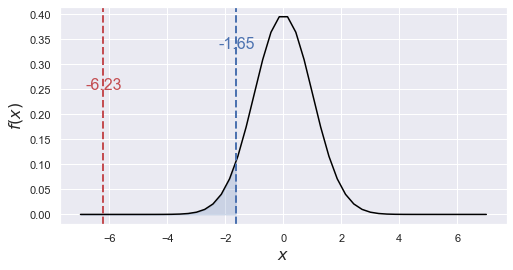

In [240]:
t_statistic, p_value = sts.ttest_ind(developer_prices, agent_prices, alternative='less')
alpha = 0.05

print(f"p-value = {p_value}")
if p_value < alpha:
    print("–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É")
else:
    print("–ù–µ –æ—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É")

mean_hat = developer_prices.mean() - agent_prices.mean()
n = len(developer_prices) + len(agent_prices) - 2
var_0 = (np.sum((developer_prices - developer_prices.mean())**2) + np.sum((agent_prices - agent_prices.mean())**2)) / n
diff_std = np.sqrt(var_0 * (1/len(developer_prices) + 1/len(agent_prices)))
asy_mean_test(mean_hat, std_hat = diff_std, n = n,  mu_0=0, alpha=0.05, alternative='less', margin=7);

**–í—ã–≤–æ–¥:** –ø–æ–ª—É—á–∞–µ—Ç—Å—è, —á—Ç–æ —Ü–µ–Ω—ã –Ω–∞ –∫–≤–∞—Ä—Ç–∏—Ä—ã –æ—Ç –∞–≥–µ–Ω—Ç—Å—Ç–≤ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ (–∏–∑-–∑–∞ –æ—á–µ–Ω—å –º–∞–ª–µ–Ω—å–∫–æ–≥–æ p-value) –ø—Ä–µ–≤—ã—à–∞—é—Ç —Ü–µ–Ω—ã –∫–≤–∞—Ä—Ç–∏—Ä –æ—Ç –∑–∞—Å—Ç—Ä–æ–π—â–∏–∫–æ–≤ 

### –ì–∏–ø–æ—Ç–µ–∑–∞ ‚Ññ2: –ö–≤–∞—Ä—Ç–∏—Ä—ã –Ω–∞ –≤—ã—Å–æ–∫–∏—Ö —ç—Ç–∞–∂–∞—Ö —Å—Ç–æ—è—Ç –¥–µ—à–µ–≤–ª–µ, —á–µ–º –∫–≤–∞—Ä—Ç–∏—Ä—ã –Ω–∞ –Ω–∏–∂–Ω–∏—Ö —ç—Ç–∞–∂–∞—Ö.

–ê–Ω–∞–ª–∏–∑–∏—Ä—É—è –≥–µ–∫—Å–∞–≥–æ–Ω–∞–ª—å–Ω—É—é –±–∏–Ω-–¥–∏–∞–≥—Ä–∞–º–º—É —Ü–µ–Ω—ã –∫–≤–∞—Ä—Ç–∏—Ä—ã –∏ —ç—Ç–∞–∂–∞, –º—ã –∑–∞–º–µ—Ç–∏–ª–∏, —á—Ç–æ —Ü–µ–Ω—ã –Ω–∞ –∫–≤–∞—Ä—Ç–∏—Ä—ã –º–æ–≥—É—Ç –±—ã—Ç—å –Ω–∏–∂–µ –≤ —Å–ª—É—á–∞–µ, –∫–æ–≥–¥–∞ –∫–≤–∞—Ä—Ç–∏—Ä–∞ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∞ –Ω–∞ –Ω–∏–∂–Ω–∏—Ö —ç—Ç–∞–∂–∞—Ö. –ü—Ä–æ–≤–µ—Ä–∏–º —ç—Ç–æ —Å –ø–æ–º–æ—â—å—é t-—Ç–µ—Å—Ç–∞. –°—Ä–∞–≤–Ω–∏–º —Å—Ä–µ–¥–Ω–∏–µ —Ü–µ–Ω—ã –Ω–∞ –Ω–∏–∂–Ω–∏—Ö —ç—Ç–∞–∂–∞—Ö –∏ –Ω–∞ –≤–µ—Ä—Ö–Ω–∏—Ö –ø—Ä–∏ —É—Ä–æ–≤–Ω–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ Œ± = 5%. –í –≤–∏–¥–µ –≥–∏–ø–æ—Ç–µ–∑ —ç—Ç–æ —Ñ–æ—Ä–º—É–ª–∏—Ä—É–µ—Ç—Å—è —Ç–∞–∫:
                                               
\begin{equation*}
    \begin{aligned}
    & H_0: Œº_l = Œº_h \\
    & H_1: Œº_l < Œº_h, \\ 
    \end{aligned}
\end{equation*}

                                               –≥–¥–µ Œºl = –º–∞—Ç.–æ–∂–∏–¥–∞–Ω–∏–µ —Ü–µ–Ω –Ω–∞ –Ω–∏–∂–Ω–∏—Ö —ç—Ç–∞–∂–∞—Ö
                                               Œºh = –º–∞—Ç. –æ–∂–∏–¥–∞–Ω–∏–µ —Ü–µ–Ω –Ω–∞ –≤–µ—Ä—Ö–Ω–∏—Ö —ç—Ç–∞–∂–∞—Ö


–û—Ç—Å–æ—Ä—Ç–∏—Ä—É–µ–º —ç—Ç–∞–∂–∏ –ø–æ –≤–µ—Ä—Ö–Ω–∏–º –∏ –Ω–∏–∂–Ω–∏–º, —Å—á–∏—Ç–∞–µ–º, —á—Ç–æ 1, 2, 3, 4 - –Ω–∏–∂–Ω–∏–µ —ç—Ç–∞–∂–∏, —Å 4 –ø–æ 9 - —Å—Ä–µ–¥–Ω–∏–µ, –∞ –≤—ã—à–µ 9 - –≤–µ—Ä—Ö–Ω–∏–µ, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏–ª–æ—Å—å –ø—Ä–∏–º–µ—Ä–Ω–æ —Ä–∞–≤–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π.

In [241]:
floor_low = df[df['floor'] <= 4]['price']
floor_high = df[df['floor'] > 9]['price']

In [242]:
print((floor_low).size)
print((floor_high).size)

797
811


–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≤ –∫–∞–∂–¥–æ–π –≤—ã–±–æ—Ä–∫–µ, –æ–Ω–∏ +- —Ä–∞–≤–Ω—ã, —á—Ç–æ –ø—Ä–µ–∫—Ä–∞—Å–Ω–æ

p-value = 0.4161
–ù–µ –æ—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É


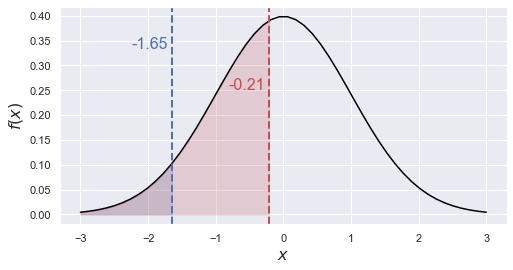

In [243]:
t_statistic, p_value = sts.ttest_ind(floor_high, floor_low, alternative='less')
alpha = 0.05

print(f"p-value = {round(p_value, 4)}")
if p_value < alpha:
    print("–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É")
else:
    print("–ù–µ –æ—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É")

mean_hat = floor_low.mean() - floor_high.mean()
n = len(floor_low) + len(floor_high) - 2
var_0 = (np.sum((floor_low - floor_low.mean())**2) + np.sum((floor_high - floor_high.mean())**2)) / n
diff_std = np.sqrt(var_0 * (1/len(floor_low) + 1/len(floor_high)))
asy_mean_test(mean_hat, std_hat = diff_std, n = n, alpha=0.05, alternative='less', margin=3);

__–í—ã–≤–æ–¥:__ –í–æ—Ç —Ç–∞–∫ –¥–∞, –î–ò –∏ t-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –≥–æ–≤–æ—Ä—è—Ç –Ω–∞–º, —á—Ç–æ —Å—Ä–µ–¥–Ω–∏–µ —Ü–µ–Ω—ã –Ω–∞ –∫–≤–∞—Ä—Ç–∏—Ä—ã –Ω–∞ –Ω–∏–∂–Ω–∏—Ö —ç—Ç–∞–∂–∞—Ö –Ω–µ –º–µ–Ω—å—à–µ, —á–µ–º —Å—Ä–µ–¥–Ω–∏–µ —Ü–µ–Ω—ã –Ω–∞ –∫–≤–∞—Ä—Ç–∏—Ä—ã –Ω–∞ –≤–µ—Ä—Ö–Ω–∏—Ö —ç—Ç–∞–∂–∞—Ö. –í–æ–∑–º–æ–∂–Ω–æ —ç—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç—è–º–∏ –≤—ã–±–æ—Ä–∫–∏, –Ω–∞–ø—Ä–∏–º–µ—Ä, –±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤.

### –ì–∏–ø–æ—Ç–µ–∑–∞ ‚Ññ3: –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–º–Ω–∞—Ç –∏ –±–ª–∏–∑–æ—Å—Ç—å –º–µ—Ç—Ä–æ –∫ —Ü–µ–Ω—Ç—Ä—É –æ–¥–∏–Ω–∞–∫–æ–≤–æ –≤–ª–∏—è—é—Ç –Ω–∞ —Å—Ç–æ–∏–º–æ—Å—Ç—å –∂–∏–ª—å—è.

–ü—Ä–æ–≤–µ–¥—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑, –º—ã –ø—Ä–∏—à–ª–∏ –∫ –≤—ã–≤–æ–¥—É, —á—Ç–æ —É–≤–µ–ª–∏—á–µ–Ω–∏–µ –∫–æ–º–Ω–∞—Ç –≤–ª–∏—è–µ—Ç –Ω–∞ —Ü–µ–Ω—É –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ, —Ç–∞–∫ –∂–µ –∫–∞–∫ –∏ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –æ—Ç –±–ª–∏–∂–∞–π—à–µ–π —Å—Ç–∞–Ω—Ü–∏–∏ –º–µ—Ç—Ä–æ –¥–æ —Ü–µ–Ω—Ç—Ä–∞ (—á–µ–º –±–ª–∏–∂–µ - —Ç–µ–º –¥–æ—Ä–æ–∂–µ, —É –Ω–∞—Å —ç—Ç–æ 'is_CAO'). –ü—Ä–æ–≤–µ—Ä–∏–º —Å –ø–æ–º–æ—â—å—é t-—Ç–µ—Å—Ç–∞ —Ä–∞–≤–Ω—ã –ª–∏ —Å—Ä–µ–¥–Ω–∏–µ —Ü–µ–Ω—ã –ø—Ä–∏ –±–æ–ª—å—à–æ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ –∫–æ–º–Ω–∞—Ç(3+) –∏ —Å—Ä–µ–¥–Ω–∏–µ —Ü–µ–Ω—ã —Ä—è–¥–æ–º —Å–æ —Å—Ç–∞–Ω—Ü–∏—è–º–∏ –º–µ—Ç—Ä–æ, –æ—Ç–Ω–æ—Å—è—â–∏—Ö—Å—è –∫ –¶–ê–û. –°—Ä–∞–≤–Ω–∏–º —ç—Ç–æ –ø—Ä–∏ —É—Ä–æ–≤–Ω–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ Œ± = 5%. –í –≤–∏–¥–µ –≥–∏–ø–æ—Ç–µ–∑ —ç—Ç–æ —Ñ–æ—Ä–º—É–ª–∏—Ä—É–µ—Ç—Å—è —Ç–∞–∫:
                                               

\begin{equation*}
    \begin{aligned}
    & H_0: Œº_r = Œº_u \\
    & H_1: Œº_r < Œº_u, \\ 
    \end{aligned}
    \end{equation*}

                                               –≥–¥–µ Œºr = –º–∞—Ç.–æ–∂–∏–¥–∞–Ω–∏–µ —Ü–µ–Ω –ø—Ä–∏ –±–æ–ª—å—à–æ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ –∫–æ–º–Ω–∞—Ç
                                               Œºu = –º–∞—Ç. –æ–∂–∏–¥–∞–Ω–∏–µ —Ü–µ–Ω —É –º–µ—Ç—Ä–æ –≤ –¶–ê–û


In [244]:
room_cost = df[df['rooms_count'] >= 3]['price']
under_cost = df[df['is_CAO'] == 1]['price']

p-value = 4.275869073770559e-17
–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É


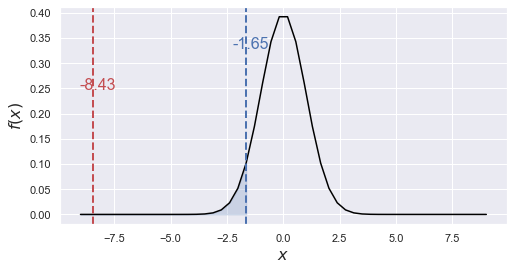

In [245]:
t_statistic, p_value = sts.ttest_ind(room_cost, under_cost, alternative='less')
alpha = 0.05

print(f"p-value = {p_value}")
if p_value < alpha:
    print("–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É")
else:
    print("–ù–µ –æ—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É")

mean_hat = under_cost.mean() - room_cost.mean()
n = len(under_cost) + len(room_cost) - 2
var_0 = (np.sum((under_cost - under_cost.mean())**2) + np.sum((room_cost - room_cost.mean())**2)) / n
diff_std = np.sqrt(var_0 * (1/len(under_cost) + 1/len(room_cost)))
asy_mean_test(mean_hat, std_hat = diff_std, n = n, alpha=0.05, alternative='less', margin=9);

__–í—ã–≤–æ–¥:__ –≤–∏–¥–∏–º, —á—Ç–æ –≥–∏–ø–æ—Ç–µ–∑–∞ –æ —Ç–æ–º, —á—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–º–Ω–∞—Ç –∏ –±–ª–∏–∑–æ—Å—Ç—å –º–µ—Ç—Ä–æ –∫ —Ü–µ–Ω—Ç—Ä—É –æ–¥–∏–Ω–∞–∫–æ–≤–æ –≤–ª–∏—è—é—Ç –Ω–∞ —Å—Ç–æ–∏–º–æ—Å—Ç—å –∂–∏–ª—å—è, –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è. –ë–æ–ª–µ–µ —Ç–æ–≥–æ, –º—ã —Ç–∞–∫ –∂–µ –ø–æ–Ω–∏–º–∞–µ–º (–∏–∑-–∑–∞ –ø–æ–ª–æ–∂–µ–Ω–∏—è t-stat), —á—Ç–æ –∏–º–µ–Ω–Ω–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–º–Ω–∞—Ç —Å–∏–ª—å–Ω–µ–µ –≤–ª–∏—è–µ—Ç –Ω–∞ —Ü–µ–Ω—É –∫–≤–∞—Ä—Ç–∏—Ä—ã, –∞ –Ω–µ –±–ª–∏–∑–æ—Å—Ç—å –º–µ—Ç—Ä–æ –∫ —Ü–µ–Ω—Ç—Ä—É –ú–æ—Å–∫–≤—ã 

### –ì–∏–ø–æ—Ç–µ–∑–∞ ‚Ññ 4: –í –¶–ê–û –∏ –≤ –¥—Ä—É–≥–∏—Ö —Ä–∞–π–æ–Ω–∞—Ö –∫–≤–∞—Ä—Ç–∏—Ä—ã –æ–¥–∏–Ω–∞–∫–æ–≤–æ–≥–æ —Ä–∞–∑–º–µ—Ä–∞.

–ù–µ –ø—Ä–æ—Å—Ç–æ —Ç–∞–∫, –º—ã –≤—ã—à–µ —Ä–∞—Å—Å—á–∏—Ç–∞–ª–∏ 'area_ratio' —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∂–∏–ª–æ–π –ø–ª–æ—â–∞–¥–∏ –∏ –ø–ª–æ—â–∞–¥–∏ –∫—É—Ö–Ω–∏. –ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ —ç—Ç–æ —Å—Ä–µ–¥–Ω–µ–µ —ç—Ç–∏—Ö —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–π –¥–ª—è –≤—Å–µ—Ö —Ä–∞–π–æ–Ω–æ–≤ –æ–¥–∏–Ω–∞–∫–æ–≤–æ–µ. –ü—Ä–æ–≤–µ—Ä–∏–º —ç—Ç–æ –ø—Ä–∏ —É—Ä–æ–≤–Ω–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ Œ± = 5%. –í –≤–∏–¥–µ –≥–∏–ø–æ—Ç–µ–∑ —ç—Ç–æ —Ñ–æ—Ä–º—É–ª–∏—Ä—É–µ—Ç—Å—è —Ç–∞–∫:
                                               

\begin{equation*}
    \begin{aligned}
    & H_0: Œº_c = Œº_o \\
    & H_1: Œº_c > Œº_o, \\ 
    \end{aligned}
    \end{equation*}

                                               –≥–¥–µ Œºc = –º–∞—Ç.–æ–∂–∏–¥–∞–Ω–∏–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏—è –∂–∏–ª–æ–π –ø–ª–æ—â–∞–¥–∏ –∏ –∫—É—Ö–Ω–∏ –≤ –¶–ê–û
                                               Œºa = –º–∞—Ç.–æ–∂–∏–¥–∞–Ω–∏–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏—è –∂–∏–ª–æ–π –ø–ª–æ—â–∞–¥–∏ –∏ –∫—É—Ö–Ω–∏ –≤ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö —Ä–∞–π–æ–Ω–∞—Ö

In [246]:
area_ratio_CAO = df[df['is_CAO'] == 1]['area_ratio']
area_ratio_other = df[df['is_CAO'] == 0]['area_ratio']

p-value: 0.0004
–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É


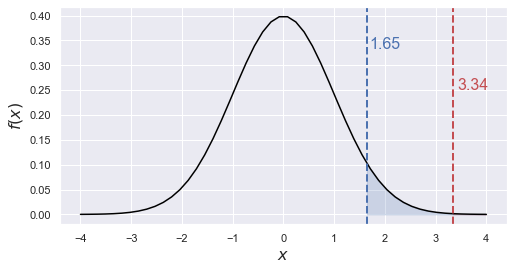

In [247]:
t_statistic, p_value = sts.ttest_ind(area_ratio_CAO ,area_ratio_other , alternative='greater')
alpha = 0.05

print(f"p-value: {round(p_value, 4)}")
if p_value < alpha:
    print("–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É")
else:
    print("–ù–µ –æ—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É")

mean_hat = area_ratio_CAO.mean() - area_ratio_other.mean()
n = len(area_ratio_CAO) + len(area_ratio_other) - 2
var_0 = (np.sum((area_ratio_CAO - area_ratio_CAO.mean())**2) + np.sum((area_ratio_other - area_ratio_other.mean())**2)) / n
diff_std = np.sqrt(var_0 * (1/len(area_ratio_CAO) + 1/len(area_ratio_other)))
asy_mean_test(mean_hat, std_hat = diff_std, n = n, alpha=0.05, alternative='larger', margin=4);

__–í—ã–≤–æ–¥:__ –í–æ—Ç —Ç–∞–∫ –æ–Ω–æ –∏ –ø–æ–ª—É—á–∞–µ—Ç—Å—è, —á—Ç–æ –≤ –¶–ê–û —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∂–∏–ª–æ–π –ø–ª–æ—â–∞–¥—å –∫–≤–∞—Ä—Ç–∏—Ä—ã –∏ –µ—ë –∫—É—Ö–Ω–∏ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –±–æ–ª—å—à–µ, —á–µ–º —ç—Ç–æ –∂–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –≤ –¥—Ä—É–≥–∏—Ö –∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ç–∏–≤–Ω—ã—Ö —Ä–∞–π–æ–Ω–∞—Ö

### –ì–∏–ø–æ—Ç–µ–∑–∞ ‚Ññ 5: –¶–µ–Ω–∞ –∑–∞ –∫–≤–∞–¥—Ä–∞—Ç–Ω—ã–π –º–µ—Ç—Ä –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –º–µ–∂–¥—É –∫–≤–∞—Ä—Ç–∏—Ä–∞–º–∏ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –∑–∞—Å—Ç—Ä–æ–π—â–∏–∫–æ–≤.

–¢–∞–∫ –∫–∞–∫ —É –Ω–∞—Å –µ—Å—Ç—å –º–Ω–æ–≥–æ —Ä–∞–∑–Ω—ã—Ö –∑–∞—Å—Ç—Ä–æ–π—â–∏–∫–æ–≤, –∏ –º—ã —Ö–æ—Ç–∏—Ç–µ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –≥–∏–ø–æ—Ç–µ–∑—É –æ —Ä–∞–∑–ª–∏—á–∏–∏ —Ü–µ–Ω –∑–∞ –∫–≤–∞–¥—Ä–∞—Ç–Ω—ã–π –º–µ—Ç—Ä –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏ –∑–∞—Å—Ç—Ä–æ–π—â–∏–∫–æ–≤, –Ω–∞–º —Å—Ç–æ–∏—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –æ–¥–Ω–æ—Ñ–∞–∫—Ç–æ—Ä–Ω—ã–π –¥–∏—Å–ø–µ—Ä—Å–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑ (ANOVA) –≤–º–µ—Å—Ç–æ –ø—Ä–æ–≤–µ–¥–µ–Ω–∏—è –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø–∞—Ä–Ω—ã—Ö t-—Ç–µ—Å—Ç–æ–≤.
–ó–¥–µ—Å—å –Ω—É–ª–µ–≤–æ–π –≥–∏–ø–æ—Ç–µ–∑–æ–π –±—É–¥–µ—Ç - —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤—Å–µ—Ö –≥—Ä—É–ø–ø —Ä–∞–≤–Ω—ã –º–µ–∂–¥—É —Å–æ–±–æ–π, —Ç–æ –µ—Å—Ç—å —Å—Ä–µ–¥–Ω–∏–µ —Ü–µ–Ω—ã –∑–∞ –∫–≤–∞–¥—Ä–∞—Ç–Ω—ã–π –º–µ—Ç—Ä —É —Ä–∞–∑–Ω—ã—Ö –∑–∞—Å—Ç—Ä–æ–π—â–∏–∫–æ–≤ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ. –£—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ = 5%

In [248]:
# –°–Ω–∞—á–∞–ª–∞ –æ—Ç—Å–æ—Ä—Ç–∏—Ä—É–µ–º –∏—Å—Ö–æ–¥–Ω—ã–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Ç–∞–∫, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è —Ç–æ–ª—å–∫–æ –æ—Ç –∑–∞—Å—Ç—Ä–æ–π—â–∏–∫–æ–≤
developer_data = df[df['author_type'] == 'developer']

In [249]:
# –°–æ–∑–¥–∞—ë–º —Å–ª–æ–≤–∞—Ä—å, –≤ –∫–æ—Ç–æ—Ä–æ–º –∫–ª—é—á - –∑–∞—Å—Ç—Ä–æ–π—â–∏–∫, –∞ –∑–Ω–∞—á–µ–Ω–∏—è - —Ü–µ–Ω—ã –∑–∞ –∫–≤–∞–¥—Ä–∞—Ç–Ω—ã–π –º–µ—Ç—Ä
prices_by_author = {}
for author, group in developer_data.groupby('author'):
    prices_by_author[author] = group['price_per_m2']

# –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –æ–¥–Ω–æ—Ñ–∞–∫—Ç–æ—Ä–Ω–æ–≥–æ –¥–∏—Å–ø–µ—Ä—Å–∏–æ–Ω–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ ANOVA
f_statistic, p_value = sts.f_oneway(*prices_by_author.values())

print("p-value =", p_value)

p-value = 2.760661217189589e-19


__–í—ã–≤–æ–¥:__ –Ω—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è, –∞ —ç—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã–µ —Ä–∞–∑–ª–∏—á–∏—è –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏ —Å—É—â–µ—Å—Ç–≤—É—é—Ç –∏ —Ü–µ–Ω—ã –∑–∞ –∫–≤–∞–¥—Ä–∞—Ç–Ω—ã–π –º–µ—Ç—Ä —É –∑–∞—Å—Ç—Ä–æ–π—â–∏–∫–æ–≤ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è.

### –ì–∏–ø–æ—Ç–µ–∑–∞ ‚Ññ6: –ù–µ—Ç —Ä–∞–∑–ª–∏—á–∏—è –≤ —Ü–µ–Ω–∞—Ö –Ω–∞ –∫–≤–∞—Ä—Ç–∏—Ä—ã –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —Ç–∏–ø–∞ –¥–æ–º–∞.

–í—ã—à–µ –º—ã —Å–æ–∑–¥–∞–ª–∏ –Ω–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫ 'house_category', –∫–æ—Ç–æ—Ä—ã–π –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç —Ç–∏–ø –¥–æ–º–∞ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –¥–∞—Ç—ã –∑–∞—Å—Ç—Ä–æ–π–∫–∏. –õ—é–±–æ–ø—ã—Ç–Ω–æ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å, —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è –ª–∏ —Ü–µ–Ω—ã –Ω–∞ –∫–≤–∞—Ä—Ç–∏—Ä—ã –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —Ç–∏–ø–∞ –¥–æ–º–∞. –û–ø—è—Ç—å –∂–µ –Ω–∞–º —Å—Ç–æ–∏—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –æ–¥–Ω–æ—Ñ–∞–∫—Ç–æ—Ä–Ω—ã–π –¥–∏—Å–ø–µ—Ä—Å–∏–æ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑ (ANOVA) –≤–º–µ—Å—Ç–æ –ø—Ä–æ–≤–µ–¥–µ–Ω–∏—è –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø–∞—Ä–Ω—ã—Ö t-—Ç–µ—Å—Ç–æ–≤. –ó–¥–µ—Å—å –Ω—É–ª–µ–≤–æ–π –≥–∏–ø–æ—Ç–µ–∑–æ–π –±—É–¥–µ—Ç - —Å—Ä–µ–¥–Ω–∏–µ —Ü–µ–Ω—ã –Ω–∞ –∫–≤–∞—Ä—Ç–∏—Ä—ã —É –≤—Å–µ—Ö —Ç–∏–ø–æ–≤ –¥–æ–º–æ–≤ —Ä–∞–≤–Ω—ã. –£—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ = 5%

In [250]:
# –°–æ–∑–¥–∞—ë–º —Å–ª–æ–≤–∞—Ä—å, –≤ –∫–æ—Ç–æ—Ä–æ–º –∫–ª—é—á - —Ç–∏–ø –¥–æ–º–∞, –∞ –∑–Ω–∞—á–µ–Ω–∏—è - —Ü–µ–Ω—ã
house_category = {}
for category, group in df.groupby('house_category'):
    house_category[category] = group['price']

# –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –æ–¥–Ω–æ—Ñ–∞–∫—Ç–æ—Ä–Ω–æ–≥–æ –¥–∏—Å–ø–µ—Ä—Å–∏–æ–Ω–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ ANOVA
f_statistic, p_value = sts.f_oneway(*house_category.values())

print("p-value =", p_value)

p-value = 1.1240278390486028e-21


__–í—ã–≤–æ–¥:__ –æ—á–µ–≤–∏–¥–Ω–æ, —á—Ç–æ –Ω—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è, –∞ —ç—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ —Ü–µ–Ω–∞ –Ω–∞ –∫–≤–∞—Ä—Ç–∏—Ä—É —Å–∏–ª—å–Ω–æ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —Ç–∏–ø–∞ –¥–æ–º–∞.

# –ú–∞—à–∏–Ω–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ

–í –¥–∞–Ω–Ω–æ–º —Ä–∞–∑–¥–µ–ª–µ –º—ã –ø–æ–ø—Ä–æ–±—É–µ–º –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –º–æ–¥–µ–ª—å, –ø—Ä–¥–µ—Å–∫–∞–∑—ã–≤–∞—é—â—É—é —Å—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä—ã –Ω–∞ –æ—Å–Ω–æ–≤–µ –±–∞–∑–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–∂–Ω–æ –Ω–∞–π—Ç–∏ –≤ –æ–±—ä—è–≤–ª–µ–Ω–∏—è—Ö –Ω–∞ –¶–∏–∞–Ω–µ. –ú–Ω–æ–≥–∏–µ –∫–æ–º–ø–∞–Ω–∏–∏ –∏ —Ñ–∏–∑–∏—á–µ—Å–∫–∏–µ –ª–∏—Ü–∞, –∑–∞–Ω–∏–º–∞—é—â–∏–µ—Å—è –ø—Ä–æ–¥–∞–∂–µ–π, –æ—Ü–µ–Ω–∫–æ–π, —Å—Ç—Ä–∞—Ö–æ–≤–∞–Ω–∏–µ–º –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏, —Å—Ç—Ä–µ–º—è—Ç—å—Å—è –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ —Ç–æ—á–Ω–æ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å —Å—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä—ã, –Ω–æ —á–µ–ª–æ–≤–µ—á–µ—Å–∫–∏–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω—ã, –ø–æ—ç—Ç–æ–º—É –≤ –¥–µ–ª–æ –∏–¥–µ—Ç –º–æ–¥–µ–ª–∏ –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥—É—Ç –ø–æ–º–æ—á—å —Å–ø—Ä–∞–≤–∏—Ç—å—Å—è —Å —ç—Ç–æ–π –∑–∞–¥–∞—á–µ–π. –í –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –º—ã –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ª–∏–Ω–µ–π–Ω—ã–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —Å —Ä–∞–∑–Ω—ã–º–∏ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏, –∞ —Ç–∞–∫–∂–µ –ø–æ—á—Ç–∏ –±–µ–∑–æ—Ç–∫–∞–∑–Ω—ã–π –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç - Catboost. –û—Ü–µ–Ω–∫—É –∫–∞—á–µ—Å—Ç–≤–∞ –º–æ–¥–µ–ª–∏ –±—É–¥–µ–º –ø—Ä–æ–≤–æ–¥–∏—Ç—å –ø–æ —Ç–∞–∫–∏–º –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º, –∫–∞–∫ RMSE, MAE, MAPE, R^2. 

In [280]:
df.head()

author        author_type  floor  floors_count  rooms_count  \
1   –§–°–ö –ê–≥–µ–Ω—Ç  real_estate_agent      4            30          2.0   
2      –¢–∞—É—ç—Ä—Å          developer     46            66          2.0   
3      –¢–∞—É—ç—Ä—Å          developer     65            78          3.0   
4  Wainbridge          developer     14            20          2.0   
7     GRAVION          developer      3             9          2.0   

   total_meters  price_per_m2     price  year_of_construction  living_meters  \
1         70.60        390934  27600000                2023.0           34.8   
2         84.40        746000  62962400                2020.0           18.6   
3         81.50        865000  70497500                2019.0           18.6   
4         63.70        431711  27500000                2023.0           18.6   
7         75.48        982728  74176316                2023.0           18.6   

   kitchen_meters           district                        street  \
1            16.5  –•–æ—Ä–æ—à–µ–≤–æ-–ú–Ω–µ–≤–Ω–∏–∫–∏                           NaN   
2             9.7        –ü—Ä–µ—Å–Ω–µ–Ω—Å–∫–∏–π  1-–π –ö—Ä–∞—Å–Ω–æ–≥–≤–∞—Ä–¥–µ–π—Å–∫–∏–π –ø—Ä–æ–µ–∑–¥   
3             9.7        –ü—Ä–µ—Å–Ω–µ–Ω—Å–∫–∏–π  1-–π –ö—Ä–∞—Å–Ω–æ–≥–≤–∞—Ä–¥–µ–π—Å–∫–∏–π –ø—Ä–æ–µ–∑–¥   
4             9.7       –õ–µ–≤–æ–±–µ—Ä–µ–∂–Ω—ã–π           –õ–µ–Ω–∏–Ω–≥—Ä–∞–¥—Å–∫–æ–µ —à–æ—Å—Å–µ   
7             9.7           –Ø–∫–∏–º–∞–Ω–∫–∞            –õ–µ–Ω–∏–Ω—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç   

   underground                residential_complex  is_CAO  area_ratio  \
1     –•–æ—Ä–æ—à—ë–≤–æ                     –°–∏–¥–Ω–µ–π –°–∏—Ç–∏ –ñ–ö       0        2.11   
2  –í—ã—Å—Ç–∞–≤–æ—á–Ω–∞—è                        NEVA TOWERS       0        1.92   
3  –í—ã—Å—Ç–∞–≤–æ—á–Ω–∞—è                        NEVA TOWERS       0        1.92   
4  –ë–µ–ª–æ–º–æ—Ä—Å–∫–∞—è                          Aquatoria       0        1.92   
7  –û–∫—Ç—è–±—Ä—å—Å–∫–∞—è  CULT (–ê–ø–∞—Ä—Ç–∞–º–µ–Ω—Ç—ã –ø—Ä–µ–º–∏—É–º-–∫–ª–∞—Å—Å–∞)       1        1.92   

  house_category  
1    –ù–æ–≤–æ—Å—Ç—Ä–æ–π–∫–∞  
2    –ù–æ–≤–æ—Å—Ç—Ä–æ–π–∫–∞  
3    –ù–æ–≤–æ—Å—Ç—Ä–æ–π–∫–∞  
4    –ù–æ–≤–æ—Å—Ç—Ä–æ–π–∫–∞  
7    –ù–æ–≤–æ—Å—Ç—Ä–æ–π–∫–∞

In [251]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn. linear_model import RidgeCV
from sklearn. model_selection import RepeatedKFold
from sklearn. linear_model import LassoCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor


–£–±–∏—Ä–∞–µ–º –∞–Ω–æ–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ü–µ–Ω—ã, –∏—Å–ø–æ–ª—å–∑—É—è 1.5 –∏–Ω—Ç–µ—Ä–∫–≤–∞–Ω—Ç–∏–ª—å–Ω—ã–π —Ä–∞–∑–º–∞—Ö

In [252]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df = df[(df['price'] <= upper) & (df['price'] >= lower)]

In [253]:
df.isnull().sum()

author                     0
author_type                0
floor                      0
floors_count               0
rooms_count                0
total_meters               0
price_per_m2               0
price                      0
year_of_construction      62
living_meters              0
kitchen_meters             0
district                 255
street                   348
underground                0
residential_complex     1179
is_CAO                     0
area_ratio                 0
house_category             0
dtype: int64

–í —Å—Ç–æ–ª–±—Ü–µ residential_complex —Å–ª–∏—à–∫–æ–º –±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤, –±–æ–ª—å—à–µ –ø–æ–ª–æ–≤–∏–Ω—ã –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞, –ø–æ—ç—Ç–æ–º—É –º—ã —É–¥–∞–ª—è–µ–º —ç—Ç–æ—Ç —Å—Ç–æ–ª–±–µ—Ü, –∞ —Ç–∞–∫–∂–µ —É–¥–∞–ª—è–µ–º —Å—Ç–æ–ª–±–µ—Ü price_per_m2, —Ç–∞–∫ –∫–∞–∫ —ç—Ç–æ –ø—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è –æ—Ç –Ω–∞—à–µ–π —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π.

In [254]:
df_clear = df.drop(columns = ['residential_complex', 'price_per_m2'])

–û–±–æ–∑–Ω–∞—á–∞–µ–º —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –∏ –¥–µ–ª–∏–º –≤—ã–±–æ—Ä–∫—É

In [257]:
#–æ–±–æ–∑–Ω–∞—á–∞–µ–º —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –∏ –¥–µ–ª–∏–º –≤—ã–±–æ—Ä–∫—É
y = df_clear["price"]
X = df_clear.drop(columns = ['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 22)

# –æ—Ç–±–∏—Ä–∞–µ–º —Ç–æ–ª—å–∫–æ —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
numeric_data = X_train.select_dtypes([np.number])
numeric_data_mean = numeric_data.median()
numeric_features = numeric_data.columns

#–∑–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏
X_train = X_train.fillna(numeric_data_mean)
X_test = X_test.fillna(numeric_data_mean)

–ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö

In [258]:
scaler = StandardScaler()

X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.fit_transform(X_test[numeric_features])

–ó–∞–¥–∞–¥–∏–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è —É–¥–æ–±–Ω–æ–≥–æ –≤—ã–≤–æ–¥–∞

In [259]:
def show():
    print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
    print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
    print("Test MAPE = %.4f" % mean_absolute_percentage_error(y_test, y_pred))
    print("Train MAPE = %.4f" % mean_absolute_percentage_error(y_train, y_train_pred))
    print("Test R2 = %.4f" % r2_score(y_test, y_pred))
    print("Train R2 = %.4f" % r2_score(y_train, y_train_pred))
    print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred))
    print("Train MAE = %.4f" % mean_absolute_error(y_train, y_train_pred))

–ò—Å–ø–æ–ª—å–∑—É—è –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—é –∏ –ø–µ—Ä–µ–±–æ—Ä –ø–æ –ª—è–º–±–¥–µ, –∏—â–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä, –ø—Ä–∏ –∫–æ—Ç–æ—Ä–æ–º –¥–æ—Å—Ç–∏–≥–∞–µ—Ç—Å—è –Ω–∞–∏–º–µ–Ω—å—à–∞—è MSE –¥–ª—è Ridge —Ä–µ–≥—Ä–µ—Å—Å–∏–∏

In [260]:
cv = RepeatedKFold(n_splits= 10 , n_repeats= 3 , random_state= 6 )
model = RidgeCV(alphas = np.arange(0.01, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
model.fit(X_train[numeric_features], y_train)

y_pred = model.predict(X_test[numeric_features])
y_train_pred = model.predict(X_train[numeric_features])

show()

Test RMSE = 9788295.2888
Train RMSE = 9342167.6866
Test MAPE = 0.2746
Train MAPE = 0.2741
Test R2 = 0.7245
Train R2 = 0.7285
Test MAE = 6400075.6190
Train MAE = 6258321.7462


–ò—Å–ø–æ–ª—å–∑—É—è –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—é –∏ –ø–µ—Ä–µ–±–æ—Ä –ø–æ –ª—è–º–±–¥–µ, –∏—â–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä, –ø—Ä–∏ –∫–æ—Ç–æ—Ä–æ–º –¥–æ—Å—Ç–∏–≥–∞–µ—Ç—Å—è –Ω–∞–∏–º–µ–Ω—å—à–∞—è MSE –¥–ª—è LASSO —Ä–µ–≥—Ä–µ—Å—Å–∏–∏

In [261]:
cv = RepeatedKFold(n_splits= 10 , n_repeats= 3 , random_state= 7 )
model = LassoCV(alphas = np.arange(0.01, 1, 0.01), cv=cv)
model.fit(X_train[numeric_features], y_train, y_train)

y_pred = model.predict(X_test[numeric_features])
y_train_pred = model.predict(X_train[numeric_features])

show()

Test RMSE = 10583446.1788
Train RMSE = 10003994.3713
Test MAPE = 0.3822
Train MAPE = 0.3728
Test R2 = 0.6780
Train R2 = 0.6886
Test MAE = 7729598.9481
Train MAE = 7371864.8844


–ò—Å–ø–æ–ª—å–∑—É–µ–º –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏—é —Å –¥–µ—Ñ–æ–ª—Ç–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏

In [262]:
model = LinearRegression()
model.fit(X_train[numeric_features], y_train)

y_pred = model.predict(X_test[numeric_features])
y_train_pred = model.predict(X_train[numeric_features])

show()

Test RMSE = 9788268.2885
Train RMSE = 9342167.6843
Test MAPE = 0.2746
Train MAPE = 0.2741
Test R2 = 0.7245
Train R2 = 0.7285
Test MAE = 6400052.3981
Train MAE = 6258313.2451


–õ–∏–Ω–µ–π–Ω—ã–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —Å —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–µ–π –∏ –±–µ–∑ –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–Ω–∏ –∏ —Ç–µ –∂–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã. –ù–∞ –¥–∞–Ω–Ω–æ–º —ç—Ç–∞–ø–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å—Ä–µ–¥–Ω–∏–µ, –ø–æ–ø—Ä–æ–±—É–µ–º –∏—Ö —É–ª—É—á—à–∏—Ç—å —Å –ø–æ–º–æ—â—å—é –±—É—Å—Ç–∞–Ω—É—Ç–æ–≥–æ –∫–æ—Ç–∞ :)

### Catboost

–ü–æ–¥–±–∏—Ä–∞–µ–º –ª—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –ø–µ—Ä–µ–±–æ—Ä–æ–º –ø–æ —Å–µ—Ç–∫–µ

In [263]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
train_data = X_train[numeric_features]
eval_data = X_test[numeric_features]
train_labels = y_train

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
model = CatBoostRegressor()

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–µ—Ç–∫–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –ø–µ—Ä–µ–±–æ—Ä–∞
param_grid = {
    'iterations': [100,400, 1000],
    'learning_rate': [0.1, 0.01, 0.001],
    'depth': [4, 6, 8],
    'logging_level':["Silent"]
}

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –æ–±—ä–µ–∫—Ç–∞ GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# –ó–∞–ø—É—Å–∫ –ø–æ–∏—Å–∫–∞ –ø–æ —Å–µ—Ç–∫–µ
grid_search.fit(X_train[numeric_features], y_train)

# –í—ã–≤–æ–¥ –Ω–∞–∏–ª—É—á—à–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ –∑–Ω–∞—á–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'depth': 6, 'iterations': 1000, 'learning_rate': 0.01, 'logging_level': 'Silent'}


–ò—Å–ø–æ–ª—å–∑—É–µ–º –ª—É—á—à–∏–µ –ø–æ–¥–æ–±—Ä–∞–Ω–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –º–æ–¥–µ–ª–∏

In [264]:
model = CatBoostRegressor(iterations = 1000,
                          learning_rate = 0.01,
                          depth = 6 ,
                          loss_function='RMSE',
                          logging_level = "Silent")
model.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
y_train_pred = model.predict(X_train[numeric_features])

show()

Test RMSE = 9161176.2966
Train RMSE = 6583799.2152
Test MAPE = 0.2329
Train MAPE = 0.1985
Test R2 = 0.7587
Train R2 = 0.8651
Test MAE = 5688393.9477
Train MAE = 4434636.3655


–ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ Catboost –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —É–ª—É—á—à–∏–ª–æ –∫–∞–∂–¥—É—é –∏–∑ –º–µ—Ç—Ä–∏–∫, –Ω–æ –Ω–µ –æ—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º—Å—è –∏ –ø—Ä–æ–±—É–µ–º –¥–æ–±–∏—Ç—å—Å—è –µ—â–µ –ª—É—á—à–µ–≥–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞

#### –ü—Ä–∏–º–µ–Ω–∏–µ–º OneHotEncoding –∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã

–í –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –º—ã –æ–≥—Ä–∞–Ω–∏—á–µ–Ω—ã –≤ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ —Å—Ç–æ–ª–±—Ü–æ–≤ –∫ –∫–æ—Ç–æ—Ä—ã–º –ø—Ä–∏–º–µ–Ω—è–µ–º ohe, —á—Ç–æ–±—ã –Ω–µ —Å–¥–µ–ª–∞—Ç—å —Å–ª–∏—à–∫–æ–º –±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –∞–¥–µ–∫–≤–∞—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∫ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –∑–∞–ø–∏—Å–µ–π, –ø–æ—ç—Ç–æ–º—É –ø–æ—Å–º–æ—Ç—Ä–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º –ø—Ä–∏–∑–Ω–∞–∫–∞–º.

In [265]:
df_clear.district.value_counts().shape[0]

121

In [266]:
df_clear.street.value_counts().shape[0]

711

In [267]:
df_clear.underground.value_counts().shape[0]

258

District, underground –∏ street –æ–ø–∏—Å—ã–≤–∞—é—Ç –º–µ—Å—Ç–æ–ø–æ–ª–æ–∂–µ–Ω–∏–µ –∫–≤–∞—Ä—Ç–∏—Ä—ã –∏–ª–∏ –¥–æ–º–∞, –º—ã –º–æ–∂–µ–º –≤—ã–±—Ä–∞—Ç—å –æ–¥–∏–Ω –∏–∑ –Ω–∏—Ö –∏ –Ω–µ –ø–æ—Ç–µ—Ä—è—Ç—å –≤ –∫–∞—á–µ—Å—Ç–≤–µ. –í district –∏  street —Ç–∞–∫–∂–µ –º–Ω–æ–≥–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤, –ø–æ—ç—Ç–æ–º—É –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–º —Ä–µ—à–µ–Ω–∏–µ–º –±—É–¥–µ—Ç –æ—Å—Ç–∞–≤–∏—Ç—å underground.

In [268]:
df_clear.author_type.value_counts().shape[0]

7

In [269]:
df_clear.house_category.value_counts().shape[0]

7

author_type –∏ house_category –∏–º–µ—é—Ç –Ω–µ–º–Ω–æ–≥–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–π, –ø–æ—ç—Ç–æ–º—É –∏—Ö —Ç–æ–∂–µ –∑–∞–∫–æ–¥–∏—Ä—É–µ–º.

In [270]:
df_clear.author.value_counts().shape[0]

1424

author —É–¥–∞–ª—è–µ–º, —Ç–∞–∫ –∫–∞–∫ —Å–ª–∏—à–∫–æ–º –±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–π, –¥–∞ –∏ –æ—Å–æ–±–æ —Å–º—ã—Å–ª–∞ –æ–Ω –Ω–µ –Ω–µ—Å–µ—Ç

In [271]:
encoded_data = pd.get_dummies(df_clear[['underground', 'author_type', 'house_category']])
df_new = pd.concat([df_clear, encoded_data], axis =1)

In [272]:
#–æ–±–æ–∑–Ω–∞—á–∞–µ–º —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –∏ –¥–µ–ª–∏–º –≤—ã–±–æ—Ä–∫—É
y = df_new["price"]
X = df_new.drop(columns = ['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 22)

# –¥–µ–ª–∏–º –≤—ã–±–æ—Ä–∫—É
numeric_data = X_train.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

#–∑–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ 
X_train = X_train.fillna(numeric_data_mean)
X_test = X_test.fillna(numeric_data_mean)

In [273]:
model = Ridge()
model.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
y_train_pred = model.predict(X_train[numeric_features])

show()

Test RMSE = 7842297.4125
Train RMSE = 6197265.6877
Test MAPE = 0.2478
Train MAPE = 0.1870
Test R2 = 0.8232
Train R2 = 0.8805
Test MAE = 5245786.6676
Train MAE = 4113490.8036


In [274]:
model = Lasso()
model.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
y_train_pred = model.predict(X_train[numeric_features])

show()

Test RMSE = 8195161.5206
Train RMSE = 5979025.1109
Test MAPE = 0.2673
Train MAPE = 0.1819
Test R2 = 0.8069
Train R2 = 0.8888
Test MAE = 5375732.2814
Train MAE = 3920373.2291


–ú–µ—Ç—Ä–∏–∫–∏ –ø—Ä–∏—è—Ç–Ω–æ —É–ª—É—á—à–∏–ª–∏—Å—å –±–ª–∞–≥–æ–¥–∞—Ä—è onehotencoding –∏ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–π –æ—á–∏—Å—Ç–∫–µ –¥–∞–Ω–Ω—ã—Ö. –ü–æ–ø—Ä–æ–±—É–µ–º –ø—Ä–∏–º–µ–Ω–∏—Ç—å –Ω–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ –∫ Catboost.

In [275]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
train_data = X_train[numeric_features]
eval_data = X_test[numeric_features]
train_labels = y_train

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
model = CatBoostRegressor()

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–µ—Ç–∫–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –ø–µ—Ä–µ–±–æ—Ä–∞
param_grid = {
    'iterations': [300, 1000],
    'learning_rate': [0.1, 0.01, 0.001],
    'depth': [4, 6, 8],
    'logging_level':["Silent"]
}

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –æ–±—ä–µ–∫—Ç–∞ GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# –ó–∞–ø—É—Å–∫ –ø–æ–∏—Å–∫–∞ –ø–æ —Å–µ—Ç–∫–µ
grid_search.fit(X_train[numeric_features], y_train)

# –í—ã–≤–æ–¥ –Ω–∞–∏–ª—É—á—à–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ –∑–Ω–∞—á–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'depth': 6, 'iterations': 1000, 'learning_rate': 0.1, 'logging_level': 'Silent'}


In [276]:
model = CatBoostRegressor(iterations = 1000,
                          learning_rate = 0.1,
                          depth = 6 ,
                          loss_function='RMSE',
                          logging_level = "Silent",
                          eval_metric = "RMSE")
model.fit(train_data, train_labels)
y_pred = model.predict(eval_data)
y_train_pred = model.predict(train_data)

show()

Test RMSE = 6950050.4832
Train RMSE = 2337454.0860
Test MAPE = 0.1922
Train MAPE = 0.0898
Test R2 = 0.8611
Train R2 = 0.9830
Test MAE = 4386131.3432
Train MAE = 1790777.7549


–î–ª—è Catboost OHE —Ç–∞–∫–∂–µ –ø–æ–∑–≤–æ–ª–∏–ª —É–ª—É—á—à–∏—Ç—å –º–µ—Ç—Ä–∏–∫–∏. –í —Ü–µ–ª–æ–º –º–æ–¥–µ–ª—å —É–∂–µ –∏–º–µ–µ—Ç –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ö–æ—Ä–æ—à—É—é –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç–µ–ª—å–Ω—É—é —Å–∏–ª—É. –î–æ–ª—è –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, –æ–±—ä—è—Å–Ω—ë–Ω–Ω–æ–π —Å –ø–æ–º–æ—â—å—é —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ (R^2) = 0.86, –≤ —Å—Ä–µ–¥–Ω–µ–º –æ—à–∏–±–∫–∞ —Å–æ—Å—Ç–≤–ª—è–µ—Ç 19% –æ—Ç —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è, –Ω–æ –∞–±—Å–æ–ª—é—Ç–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –æ—à–∏–±–∫–∏ –≤—Å–µ –∂–µ –Ω–µ –º–∞–ª–µ–Ω—å–∫–æ–µ = 4_400_000—Ä.

–î–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏—è Catboost –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ –±–∏–±–ª–∏–æ—Ç–µ–∫–∞ —Å–ø–æ—Å–æ–±–Ω–∞ —Å–∞–º–∞ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –ø–æ—ç—Ç–æ–º—É –∑–∞–¥–∞–µ–º –Ω–æ–≤—ã–π –ø–∞—Ä–∞–º–µ—Ç—Ä cat_features, –∫—É–¥–∞ –ø–µ—Ä–µ–¥–∞–µ–º –Ω–∞–∑–≤–∞–Ω–∏—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

In [277]:
df.isnull().sum()

author                     0
author_type                0
floor                      0
floors_count               0
rooms_count                0
total_meters               0
price_per_m2               0
price                      0
year_of_construction      62
living_meters              0
kitchen_meters             0
district                 255
street                   348
underground                0
residential_complex     1179
is_CAO                     0
area_ratio                 0
house_category             0
dtype: int64

Catboost –Ω–µ –º–æ–∂–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å —Å nan –∏ –ø—Ä–æ—Å–∏—Ç —Å–¥–µ–ª–∞—Ç—å –∏—Ö —Å—Ç—Ä–æ–∫–∞–º–∏. –¢–∞–∫–∂–µ –∑–∞–ø–æ–ª–Ω–∏–º —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–æ–ø—É—Å–∫–∏ –º–µ–¥–∏–∞–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏.

In [278]:
#–æ–±–æ–∑–Ω–∞—á–∞–µ–º —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –∏ –¥–µ–ª–∏–º –≤—ã–±–æ—Ä–∫—É
y = df["price"]
X = df.drop(columns = ['price', "price_per_m2"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 22)

# –æ—Ç–±–∏—Ä–∞–µ–º —Ç–æ–ª—å–∫–æ —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
numeric_data = X_train.select_dtypes([np.number])
numeric_data_mean = numeric_data.median()
numeric_features = numeric_data.columns

#–∑–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏
X_train = X_train.fillna(numeric_data_mean)
X_test = X_test.fillna(numeric_data_mean)

#–¥–µ–ª–∞–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ —Å—Ç—Ä–æ–∫–æ–π
X_train = X_train.fillna("NaN")
X_test = X_test.fillna("NaN")

In [279]:
model = CatBoostRegressor(loss_function='RMSE',
                          logging_level = "Silent",
                          eval_metric = "RMSE", 
                          cat_features =  ['author', "author_type", 'district',
                                           'street', 'residential_complex', 'underground', 'house_category'])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

show()

Test RMSE = 6406179.0232
Train RMSE = 4082639.4713
Test MAPE = 0.1571
Train MAPE = 0.1106
Test R2 = 0.8820
Train R2 = 0.9481
Test MAE = 3943046.0321
Train MAE = 2627953.9336


–î–∞, –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ, Catboost –æ—Ç–ª–∏—á–Ω–æ —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è —Å–∞–º —Å –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏. –ú–µ—Ç—Ä–∏–∫–∏ —Å–Ω–æ–≤–∞ —É–ª—É—á—à–∏–ª–∏—Å—å –∏ –º–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ —Ö–æ—Ä–æ—à–µ–µ, –æ–Ω–∞ –æ–¥–Ω–æ–∑–Ω–∞—á–Ω–æ –∏–º–µ–µ—Ç —Å–º—ã—Å–ª.

–î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ –º–æ–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –ø—Ä–∏–º–µ–Ω–∏—Ç—å Scaler –∏ —Å–Ω–æ–≤–∞ –∑–∞–ø—É—Å—Ç–∏—Ç—å –±—É—Å—Ç–∏–Ω–≥

In [160]:
scaler = StandardScaler()

X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.fit_transform(X_test[numeric_features])

In [161]:
model = CatBoostRegressor(loss_function='RMSE',
                          logging_level = "Silent",
                          eval_metric = "RMSE", 
                          cat_features =  ['author', "author_type", 'district',
                                           'street', 'residential_complex', 'underground', 'house_category'])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

show()

Test RMSE = 6668006.1783
Train RMSE = 4082639.4713
Test MAPE = 0.1560
Train MAPE = 0.1106
Test R2 = 0.8722
Train R2 = 0.9481
Test MAE = 4014015.6633
Train MAE = 2627953.9336


In [166]:
#–æ–±–æ–∑–Ω–∞—á–∞–µ–º —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –∏ –¥–µ–ª–∏–º –≤—ã–±–æ—Ä–∫—É
y = df["price"]
X = df.drop(columns = ['price', "price_per_m2", 'author', 'residential_complex'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 22)

# –æ—Ç–±–∏—Ä–∞–µ–º —Ç–æ–ª—å–∫–æ —á–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
numeric_data = X_train.select_dtypes([np.number])
numeric_data_mean = numeric_data.median()
numeric_features = numeric_data.columns

#–∑–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏,
X_train = X_train.fillna(numeric_data_mean)
X_test = X_test.fillna(numeric_data_mean)

#–¥–µ–ª–∞–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ —Å—Ç—Ä–æ–∫–æ–π
X_train = X_train.fillna("NaN")
X_test = X_test.fillna("NaN")

–ú–µ—Ç—Ä–∏–∫–∏ –ø–æ—á—Ç–∏ –Ω–µ –∏–∑–º–µ–Ω–∏–ª–∏—Å—å, –ø–æ—ç—Ç–æ–º—É –æ—Å–æ–±–æ–≥–æ —Å–º—ã—Å–ª–∞ –≤ —ç—Ç–æ–º –Ω–µ –±—ã–ª–æ.

## –í—ã–≤–æ–¥

–ï—Å–ª–∏ –Ω–µ –∑–Ω–∞–µ—à—å, —á—Ç–æ –¥–µ–ª–∞—Ç—å —Å –¥–∞–Ω–Ω—ã–º–∏, –ø—Ä–æ—Å—Ç–æ –∏–º–ø–æ—Ä—Ç–Ω–∏ catboost –∏ –∑–∞–ø—É—Å—Ç–∏ –Ω–∞ –¥–µ—Ñ–æ–ª—Ç–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–∞—Ö, –æ–Ω —Å–∞–º —Ä–∞–∑–±–µ—Ä–µ—Ç—Å—è......
–ê –µ—Å–ª–∏ —Å–µ—Ä—å–µ–∑–Ω–æ, —Ç–æ –º–æ–¥–µ–ª—å –∏–º–µ–µ—Ç –º–µ—Å—Ç–æ –Ω–∞ –∂–∏–∑–Ω—å –∏ –Ω–µ–ø–ª–æ—Ö—É—é –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç–µ–ª—å–Ω—É—é —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å. –¢–æ –µ—Å—Ç—å, –º—ã –º–æ–∂–µ–º –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞—Ç—å —Ü–µ–Ω—É –Ω–∞ –æ—Å–Ω–æ–≤–µ —Ç–∞–∫–∏—Ö –¥–∞–Ω–Ω—ã—Ö, –∫–∞–∫ –≥–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–æ–µ –ø–æ–ª–æ–∂–µ–Ω–∏–µ (—Å—Ç–∞–Ω—Ü–∏—è –º–µ—Ç—Ä–æ, —Ä–∞–π–æ–Ω, —É–ª–∏—Ü–∞), –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–º–Ω–∞—Ç, —ç—Ç–∞–∂–Ω–æ—Å—Ç—å –∑–¥–∞–Ω–∏—è –∏ —ç—Ç–∞–∂ –∫–≤–∞—Ä—Ç–∏—Ä—ã, –≥–æ–¥ –ø–æ—Å—Ç—Ä–æ–π–∫–∏ –∑–¥–∞–Ω–∏—è, –∂–∏–ª–∞—è –ø–ª–æ—â–∞–¥—å –∏ –ø–ª–æ—â–∞–¥—å –∫—É—Ö–Ω–∏ –∏ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –¥—Ä—É–≥–∏—Ö. –ï—Å–ª–∏ —É–≤–µ–ª–∏—á–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–æ–±—Ä–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –º–æ–∂–Ω–æ –¥–æ–±–∏—Ç—å—Å—è –µ—â–µ –±–æ–ª–µ–µ —Ç–æ—á–Ω–æ–≥–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞ –∏ —Å–¥–µ–ª–∞—Ç—å –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ç–æ—á–Ω—É—é –º–æ–¥–µ–ª—å.

–ü—Ä–∏ —ç—Ç–æ–º –Ω—É–∂–Ω–æ —á–µ—Ç–∫–æ —Ä–∞–∑–≥—Ä–∞–Ω–∏—á–∏–≤–∞—Ç—å –≤—Ä–µ–º—è —Å–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞, –ø–æ—Ç–æ–º—É —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –º–µ—Å—è—á–Ω–æ–π –¥–∞–≤–Ω–æ—Å—Ç–∏ –º–æ–≥—É—Ç —É–∂–µ –±—ã—Ç—å –Ω–µ –æ—á–µ–Ω—å –∞–∫—Ç—É–∞–ª—å–Ω—ã–º–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –≤–æ–π–Ω–∞ –º–æ–∂–µ—Ç –Ω–∞—á–∞—Ç—å—Å—è, –¥–æ–ª–ª–∞—Ä 120 —Å—Ç–∞—Ç—å, –∫–ª—é—á –≤ –∫–æ—Å–º–æ—Å —É–ª–µ—Ç–µ—Ç—å, –ª—å–≥–æ—Ç–Ω—É—é –∏–ø–æ—Ç–µ–∫—É –ø—Ä–∏–∫—Ä—ã—Ç—å, –ø–ª–∞—Ç–µ–∂–Ω–æ—Å–ø–æ—Å–æ–±–Ω–æ–µ –Ω–∞—Å–µ–ª–µ–Ω–∏–µ —É–µ—Ö–∞—Ç—å –≤ –∫–∞–∑–∞—Ö—Å–∫–∏–µ —Å—Ç–µ–ø–∏, –≤ –æ–±—â–µ–º –¥—Ä—É–≥–∏—Ö —Ñ–∞–∫—Ç–æ—Ä–æ–≤, –≤–ª–∏—è—é—â–∏—Ö –Ω–∞ —Å—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä—ã, –æ—á–µ–Ω—å –º–Ω–æ–≥–æ –∏ –∏—Ö —Ç–æ–∂–µ –Ω—É–∂–Ω–æ —É—á–∏—Ç—ã–≤–∞—Ç—å –ø—Ä–∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏.